<h1 style="color:OrangeRed; text-align:center;"> DATA SCIENCE PROJECT CYCLE </h1>

![crisp-ds](../img/crisp_ds.png)

![crisp-ds](/img/crisp_ds.png)

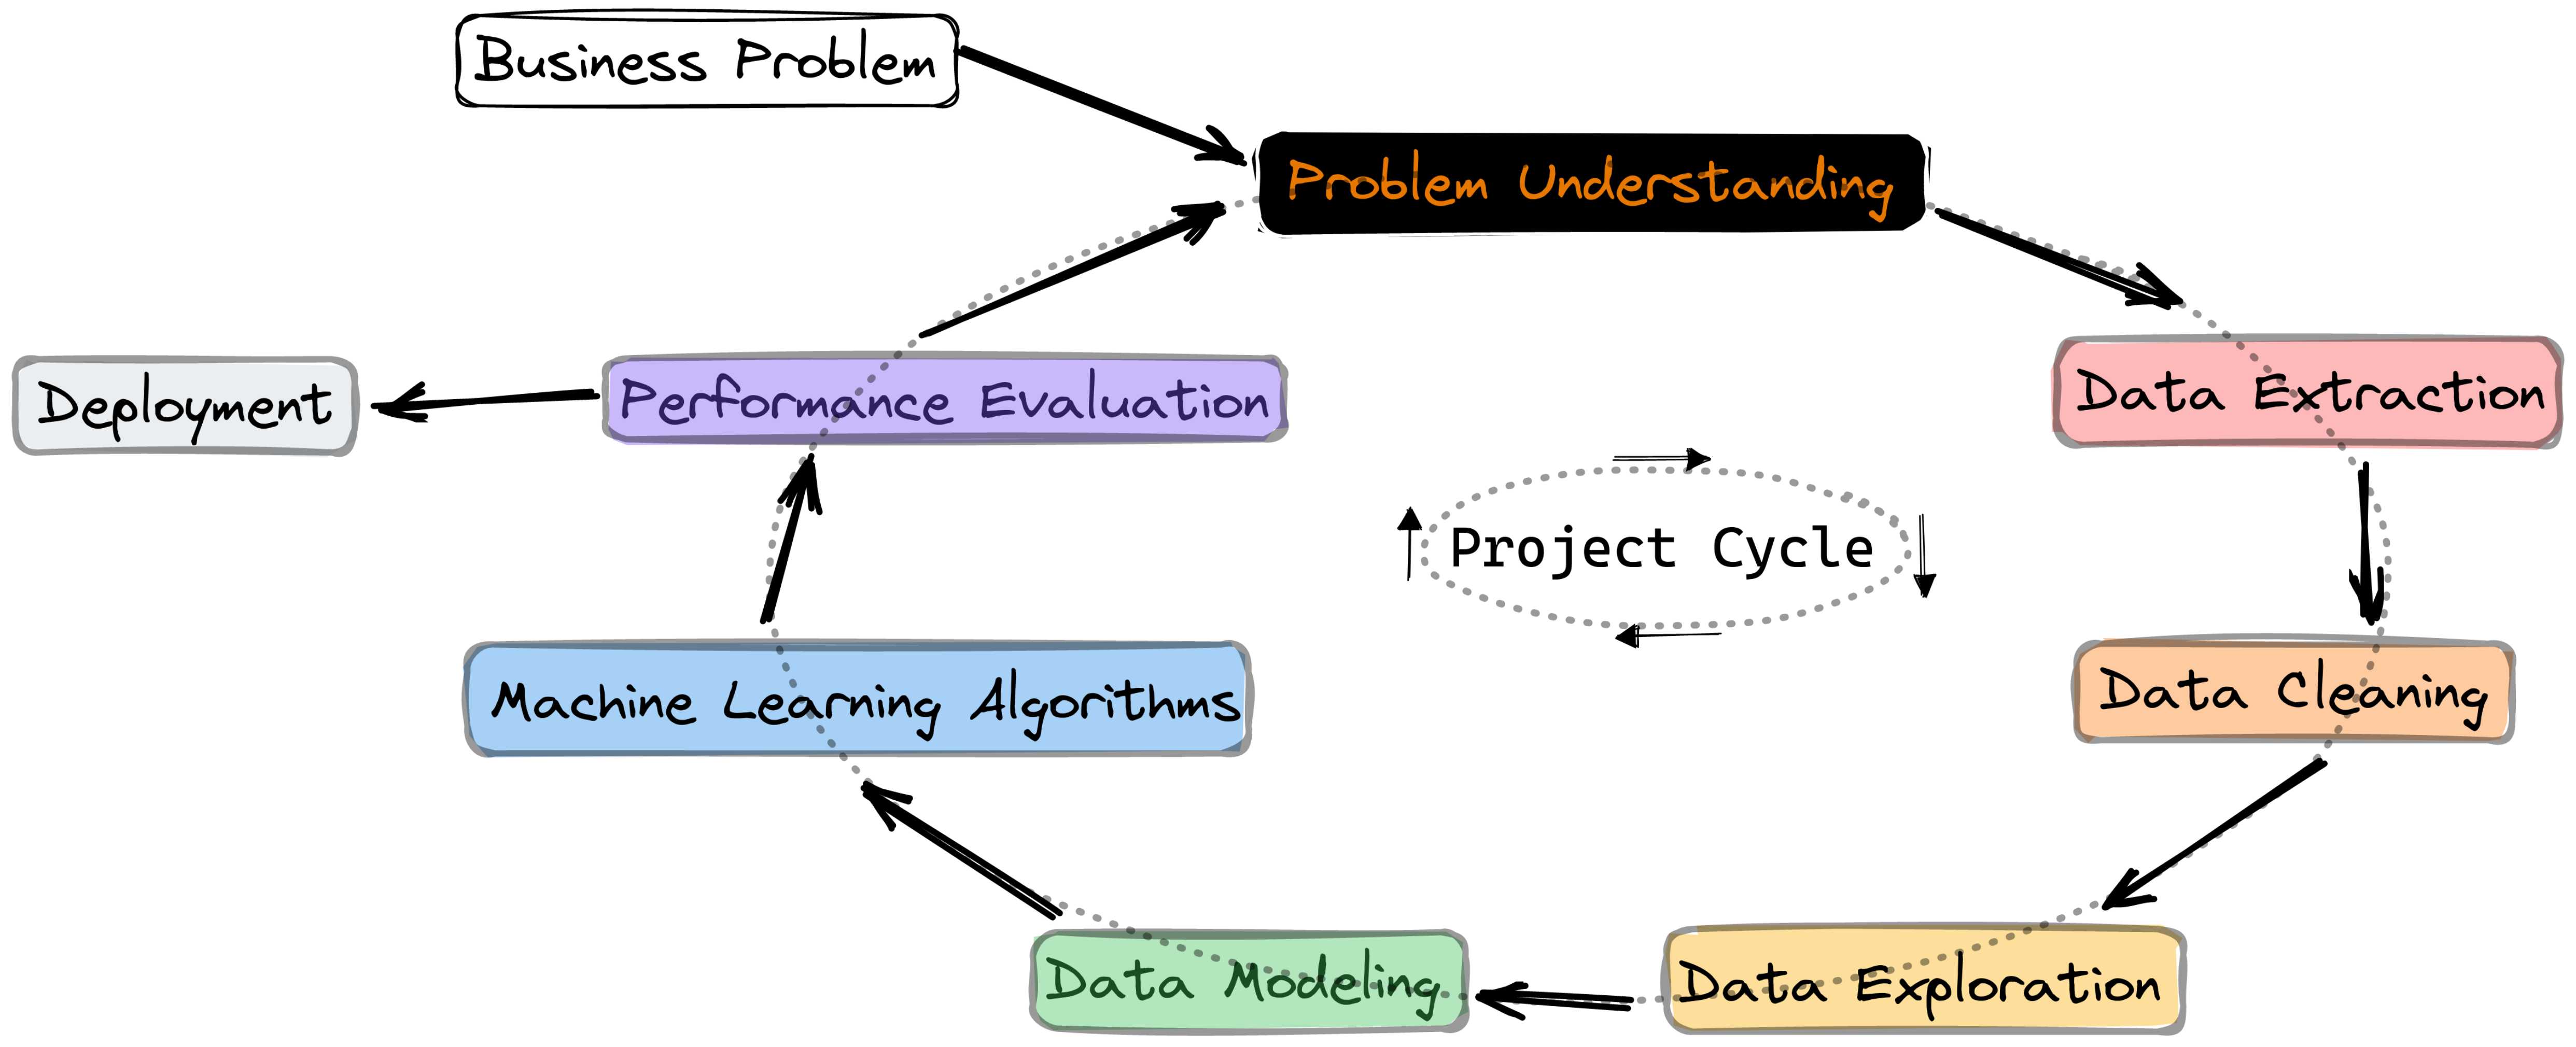

In [2]:
from IPython.display import Image
Image(filename='../img/crisp_ds.png')

<h1 style="color:OrangeRed; text-align:center;"> BUSINESS PROBLEM </h1>

<h1>What is the company?</h1>

A3Data

<h1>What is its business model?</h1>

A3Data is one of the leading consultancies specialising in data and artificial intelligence in Brazil. The company focus on the cultural and the analytical transformation of medium and large organizations.

<h1>What is the business problem the company is facing?</h1>

A3Data was given the task to find out what are the main factors associated with aeronautical accidents given the public database from the Brazilian Aeronautical Accident Investigation and Prevention Center. These factors (and insights) from this analysis will be used for public campaigns to advise population, politicians and companies about what should be done to reduce the number of accidents.

<h1 style="color:OrangeRed; text-align:center;"> PROBLEM UNDERSTANGING </h1>

<h1>What is the business solution that this project has to deliver?</h1>

Based on the given dataset, this project has to deliver insights that could be used in public campaigns to reduce the number of aeronautical accidents. These insights will be delivered in the format of a presentation with concise explanations about the process used to explore the data available, about what were the raised and validated hypotheses, and what were the concluding insights.

<br>
<br>
References:

https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira

<h1 style="color:OrangeRed; text-align:center;"> BUSINESS ASSUMPTIONS FOR THIS CYCLE </h1>

<ul>
    <li>The main goal of this project is to find out what are the most main factors in regard to aeronautical accidents</li>
    <br>
    <li>All *** values mean that data is not available (missing data)</li>
    <br>
    <li>
    </li>
    <br>
    <li>
    </li>
</ul>

<h1 style="color:OrangeRed; text-align:center;"> SOLUTION STRATEGY </h1>

![IOT-method](../img/IoT_method.png)

<h1>INPUT</h1>

- **Business problem**: data exploration to raise intelligence from available data

- **Business questions**: what are the main factors associated with aeronautical accidents that could be used in public campaigns to reduce the number of aeronautical accidents

- **Available data**: a public database from the Brazilian Aeronautical Accident Investigation and Prevention Center


<br>
<h1>OUTPUT</h1>

- A **presentation** with:
    - concise explanations about the process used to explore the data available
    - what were the raised and the validated hypotheses
    - what were the concluding insights

- A **Github repository** with the **code** used

<br>
<h1>TASKs</h1>

- What are the **main factors** related to **aeronautical accidents**:

    - **1** - Understand what is the main goal
    - **2** - Define the scope of the solution (for this project cycle)
    - **3** - Understand the data available (at a high level)
    - **4** - Load the data and merge required tables
    - **5** - Clean and prepare the data for analysis  
    - **6** - Define hypotheses that will be tested on the present project cycle
    - **7** - Search for rows with misleading data (in regard to business understanding)
    - **8** - Explore the data to get insights
    - **9** - Prepare the storytelling in regard to what is required for the final product

<h1 style="color:OrangeRed; text-align:center;"> HYPOTHESIS MIND MAP </h1>

![sales-mind-map](../img/mind_map.png)

The above image is the product of **a brainstorm that took into consideration factors that could contribute to an aeronautic accident**. This mind map is a great help when trying to **raise hypotheses** that could **lead to insights**. It is also helpful to **guide feature engineering** (create new relevant features) and when there is a need to **look for more data elsewhere**.

---

<h1 style="color:RoyalBlue; text-align:center;"> CODE </h1>

# 1 - IMPORTS

## 1.1 - Libraries

*Load required libraries for the project*

In [1]:
# data manipulation
import numpy  as np
import pandas as pd

# plot
import seaborn           as sns
import matplotlib.pyplot as plt

# project library
from a3data_case.initial_config   import initial_settings
from a3data_case.data_extraction  import downcast_dataframe
from a3data_case.data_description import check_dataframe, clean_lat_long, summary_statistics
from a3data_case.eda              import categorical_plot, numerical_plot, create_cramer_v_dataframe

## 1.2 - Functions

*Define functions that will be used on the project*

NOTE: Most functions made for this project are inside the project library. That is, **a package called "a3data_case" was created to hold all functions that will be needed for this project.**


For further details, please check the modules inside "a3data_case" package [in other words, check .py files inside a3data_case folder]

In [2]:
# example of function created for this project
help(check_dataframe)

Help on function check_dataframe in module a3data_case.data_description:

check_dataframe(dataframe, head=True, head_size=5, sample_size=5)
    It prints the number of NAs, the percentage of NA, the number of unique values and the data type for each column.
    It prints dataframe shape and also displays statistics for numerical variables.
    Finally, it displays the dataframe head or a random sample of dataframe according to user choice
    
    Args
        dataframe: the pandas dataframe that the user wants to check
        head: boolean that indicate if user wants to see 
            the head of the dataframe (True) or 
            a sample of the dataframe (False)
        head_size: size of the dataframe.head() function 
        sample_size: size of the dataframe.sample() function 
    
    Return
        None: a none type object



In [3]:
# example of function created for this project
help(downcast_dataframe)

Help on function downcast_dataframe in module a3data_case.data_extraction:

downcast_dataframe(df, verbose=True)
    Try to downcast numeric columns of the dataframe so as to use less memory.
    
    Args
        df: a pd.DataFrame object
        verbose: a boolean to check if user wants to see downcast report
    
    Return
        dataframe: a pd.DataFrame object with downcasted columns if it was possible; 
            otherwise, it will just return the original dataframe columns



## 1.3 - Setup

*Set some configurations for the whole project*

In [4]:
# don't cache libraries (especially a3data_case library)
%load_ext autoreload
%autoreload 2

In [5]:
# initial setup of dataframes and plots
initial_settings()

## 1.4 - Constants 

*Define constants that will be used throughout the project*

In [6]:
# No need for constants so far.

# 2 - DATA EXTRACTION

## 2.1 - Files Description

*Describe available data in regard to database information*

Available tables:

- **OCORRÊNCIA.csv** - Informações sobre as ocorrências.

- **OCORRÊNCIA_TIPO.csv** - Informações sobre o tipo de ocorrência.

- **AERONAVE.csv** - Informações sobre as aeronaves envolvidas nas ocorrências.

- **FATOR_CONTRIBUINTE.csv** - Informações sobre os fatores contribuinte das ocorrências que tiveram investigações finalizadas.

- **RECOMENDAÇÃO.csv** - Informações sobre as recomendações de segurança geradas nas ocorrências.

REFERENCE:
    
https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira

## 2.2 - Entity Relationship Diagram

*Display Entity-Relationship Diagram to understand how to merge tables*

![entity_relationship-diagram](../img/entity_relationship_diagram.png)

REFERENCE:
    
https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira

## 2.3 - Data Loading

*Load data from required files*

In [7]:
# load data from csv files
df_ocor = pd.read_csv("../raw_data/ocorrencia.csv", sep = ";", low_memory = False)
df_aero = pd.read_csv("../raw_data/aeronave.csv", sep = ";", low_memory = False)
df_fator_contrib = pd.read_csv("../raw_data/fator_contribuinte.csv", sep = ";", low_memory = False)
df_recom = pd.read_csv("../raw_data/recomendacao.csv", sep = ";", low_memory = False)
df_ocor_tipo = pd.read_csv("../raw_data/ocorrencia_tipo.csv", sep = ";", low_memory = False)

# check dataframe heads
display("Ocorrencia", df_ocor.shape, df_ocor.head())
display("Aeronave", df_aero.shape, df_aero.head())
display("Fator Contribuinte", df_fator_contrib.shape, df_fator_contrib.head())
display("Recomendação", df_recom.shape, df_recom.head())
display("Ocorrencia Tipo", df_ocor_tipo.shape, df_ocor_tipo.head())

'Ocorrencia'

(5167, 22)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,52242,52242,52242,52242,52242,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,...,05/01/2012,20:27:00,***,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,...,06/01/2012,13:44:00,SIM,FINALIZADA,A-582/CENIPA/2014,SIM,2016-09-01,3,1,NÃO
2,45333,45333,45333,45333,45333,ACIDENTE,***,***,VIAMÃO,RS,...,06/01/2012,13:00:00,NaN,FINALIZADA,A-070/CENIPA/2013,SIM,2013-11-27,0,1,NÃO
3,45401,45401,45401,45401,45401,ACIDENTE,***,***,SÃO SEBASTIÃO,SP,...,06/01/2012,17:00:00,***,NaN,NaN,NÃO,NaN,0,1,NÃO
4,45407,45407,45407,45407,45407,ACIDENTE,***,***,SÃO SEPÉ,RS,...,06/01/2012,16:30:00,SIM,FINALIZADA,A-071/CENIPA/2013,SIM,2013-11-27,0,1,NÃO


'Aeronave'

(5235, 23)

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,...,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,45331,PRTKB,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,AT45,TURBOÉLICE,BIMOTOR,18600,...,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0
1,45332,PTUDD,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,...,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,AGRÍCOLA,SUBSTANCIAL,0
2,45333,PTGOO,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201,IPAN,PISTÃO,MONOMOTOR,1800,...,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0
3,45334,PRMHX,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-214,A320,JATO,BIMOTOR,77000,...,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,CORRIDA APÓS POUSO,REGULAR,LEVE,0
4,45390,PTUEW,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,...,BRASIL,BRASIL,AVIÃO,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0


'Fator Contribuinte'

(3464, 5)

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,45331,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,45331,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
2,45331,CAPACITAÇÃO E TREINAMENTO,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO
3,45331,CLIMA ORGANIZACIONAL,ASPECTO PSICOLÓGICO,ORGANIZACIONAL,FATOR HUMANO
4,45331,COMUNICAÇÃO,ASPECTO PSICOLÓGICO,PSICOSSOCIAL,FATOR HUMANO


'Recomendação'

(1197, 9)

,codigo_ocorrencia4,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
0,45331,A-582/CENIPA/2014 - 01,2016-07-29,2016-08-25,2016-12-20,Atuar junto às empresas que operam segundo o R...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1,45331,A-582/CENIPA/2014 - 02,2016-07-29,2016-08-25,2016-12-20,Atuar junto à Administração do Aeroporto Inter...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
2,45331,A-582/CENIPA/2014 - 03,2016-07-29,2016-08-25,NaN,Orientar as suas organizações subordinadas em ...,AGUARDANDO RESPOSTA,DECEA,DEPARTAMENTO DE CONTROLE DE ESPAÇO AÉREO
3,45392,A-032/CENIPA/2014 - RSV 001,2014-04-07,2015-04-14,2015-08-21,Divulgar aos operadores de helicópteros vincul...,CUMPRIDA DE FORMA ALTERNATIVA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
4,45392,A-032/CENIPA/2014 - RSV 002,2014-04-07,2015-04-14,2015-08-17,Tendo em vista os fatos levantados nesta inves...,NÃO CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL


'Ocorrencia Tipo'

(5347, 4)

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,45331,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR
1,45332,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G
2,45333,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
3,45334,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
4,45390,OPERAÇÃO A BAIXA ALTITUDE,OPERAÇÃO A BAIXA ALTITUDE,LALT


**Note that "Fator Contribuinte" and "Recomendação" have many duplicated rows in terms of codigo_ocorrencia. Once we also don't have a clear description of the columns for these dataframes and just based on dataframe inspection it is not clear why this values are duplicated and what duplication means, we decided not to use these dataframes in order to avoid misleading conclusions (based on unguided assumptions)**

## 2.4 - Merge Dataframes

*Merge dataframes according to Entity-Relationship Diagram*

In [8]:
# (left) merge df_ocor with df_aero
df_ = pd.merge(left = df_ocor, right = df_aero, 
               on = "codigo_ocorrencia2", 
               how = "left")

# (left) merge resulting df_ with df_ocor_tipo
df_extraction = pd.merge(left = df_, right = df_ocor_tipo, 
                         on = "codigo_ocorrencia1", 
                         how = "left")

# check resulting dataframe
check_dataframe(df_extraction)

Dataframe size in memory: 13.777 MB 



,Num NAs,Percent NAs,Num unique,Data Type
codigo_ocorrencia,0,0.000,5167,int64
codigo_ocorrencia1,0,0.000,5167,int64
codigo_ocorrencia2,0,0.000,5167,int64
codigo_ocorrencia3,0,0.000,5167,int64
codigo_ocorrencia4,0,0.000,5167,int64
ocorrencia_classificacao,0,0.000,3,object
ocorrencia_latitude,983,18.150,2590,object
ocorrencia_longitude,983,18.150,2593,object
ocorrencia_cidade,0,0.000,1053,object
ocorrencia_uf,0,0.000,28,object


Dataframe shape is (5417, 47) 



Statistics for Numerical Variables


,attribute,mean,median,std,iqr,min,max,range,skew,kurtosis
0,codigo_ocorrencia,64310.518553,65800.000000,13810.870147,27894.000000,45331.000000,80468.000000,35137.000000,-0.045977,-1.764451
1,codigo_ocorrencia1,64310.518553,65800.000000,13810.870147,27894.000000,45331.000000,80468.000000,35137.000000,-0.045977,-1.764451
2,codigo_ocorrencia2,64310.518553,65800.000000,13810.870147,27894.000000,45331.000000,80468.000000,35137.000000,-0.045977,-1.764451
3,codigo_ocorrencia3,64310.518553,65800.000000,13810.870147,27894.000000,45331.000000,80468.000000,35137.000000,-0.045977,-1.764451
4,codigo_ocorrencia4,64310.518553,65800.000000,13810.870147,27894.000000,45331.000000,80468.000000,35137.000000,-0.045977,-1.764451
5,total_recomendacoes,0.239616,0.000000,0.856188,0.000000,0.000000,13.000000,13.000000,5.804399,47.426424
6,total_aeronaves_envolvidas,1.026952,1.000000,0.171897,0.000000,1.000000,3.000000,2.000000,6.796487,50.146806
7,aeronave_pmd,14432.685989,1968.000000,33655.995399,4150.000000,0.000000,396895.000000,396895.000000,4.841506,34.269100
8,aeronave_pmd_categoria,14432.685989,1968.000000,33655.995399,4150.000000,0.000000,396895.000000,396895.000000,4.841506,34.269100
9,aeronave_assentos,26.727290,nan,53.804013,nan,0.000000,384.000000,384.000000,2.530607,6.249537




Dataframe head:


,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,52242,52242,52242,52242,52242,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,...,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,PRIVADA,LEVE,0,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
1,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,...,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR
2,45333,45333,45333,45333,45333,ACIDENTE,***,***,VIAMÃO,RS,...,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
3,45401,45401,45401,45401,45401,ACIDENTE,***,***,SÃO SEBASTIÃO,SP,...,EXPERIMENTAL,FORA DE AERODROMO,FORA DE AERODROMO,CRUZEIRO,EXPERIMENTAL,LEVE,0,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
4,45407,45407,45407,45407,45407,ACIDENTE,***,***,SÃO SEPÉ,RS,...,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,AGRÍCOLA,SUBSTANCIAL,0,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G


In [9]:
# downcast numerical variables of dataframe
df_extraction = downcast_dataframe( df_extraction )

# check dataframe
df_extraction.head()

Dataframe size was reduced to 2.00% of its original size. 
Initial dataframe size: 14.01 MB 
Final dataframe size: 13.71 MB


,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,52242,52242,52242,52242,52242,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,...,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,PRIVADA,LEVE,0,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
1,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,...,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR
2,45333,45333,45333,45333,45333,ACIDENTE,***,***,VIAMÃO,RS,...,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
3,45401,45401,45401,45401,45401,ACIDENTE,***,***,SÃO SEBASTIÃO,SP,...,EXPERIMENTAL,FORA DE AERODROMO,FORA DE AERODROMO,CRUZEIRO,EXPERIMENTAL,LEVE,0,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
4,45407,45407,45407,45407,45407,ACIDENTE,***,***,SÃO SEPÉ,RS,...,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,AGRÍCOLA,SUBSTANCIAL,0,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G


# 3 - DATA DESCRIPTION

## 3.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [10]:
# create a restore point for the previous section dataframe
df_description = df_extraction.copy()

# check dataframe
check_dataframe( df_description )

Dataframe size in memory: 13.706 MB 



,Num NAs,Percent NAs,Num unique,Data Type
codigo_ocorrencia,0,0.000,5167,int32
codigo_ocorrencia1,0,0.000,5167,int32
codigo_ocorrencia2,0,0.000,5167,int32
codigo_ocorrencia3,0,0.000,5167,int32
codigo_ocorrencia4,0,0.000,5167,int32
ocorrencia_classificacao,0,0.000,3,object
ocorrencia_latitude,983,18.150,2590,object
ocorrencia_longitude,983,18.150,2593,object
ocorrencia_cidade,0,0.000,1053,object
ocorrencia_uf,0,0.000,28,object


Dataframe shape is (5417, 47) 



Statistics for Numerical Variables


,attribute,mean,median,std,iqr,min,max,range,skew,kurtosis
0,codigo_ocorrencia,64310.518553,65800.000000,13810.870147,27894.000000,45331.000000,80468.000000,35137.000000,-0.045977,-1.764451
1,codigo_ocorrencia1,64310.518553,65800.000000,13810.870147,27894.000000,45331.000000,80468.000000,35137.000000,-0.045977,-1.764451
2,codigo_ocorrencia2,64310.518553,65800.000000,13810.870147,27894.000000,45331.000000,80468.000000,35137.000000,-0.045977,-1.764451
3,codigo_ocorrencia3,64310.518553,65800.000000,13810.870147,27894.000000,45331.000000,80468.000000,35137.000000,-0.045977,-1.764451
4,codigo_ocorrencia4,64310.518553,65800.000000,13810.870147,27894.000000,45331.000000,80468.000000,35137.000000,-0.045977,-1.764451
5,total_recomendacoes,0.239616,0.000000,0.856188,0.000000,0.000000,13.000000,13.000000,5.804399,47.426424
6,total_aeronaves_envolvidas,1.026952,1.000000,0.171897,0.000000,1.000000,3.000000,2.000000,6.796487,50.146806
7,aeronave_pmd,14432.685989,1968.000000,33655.995399,4150.000000,0.000000,396895.000000,396895.000000,4.841506,34.269100
8,aeronave_pmd_categoria,14432.685989,1968.000000,33655.995399,4150.000000,0.000000,396895.000000,396895.000000,4.841506,34.269100
9,aeronave_assentos,26.727289,nan,53.804012,nan,0.000000,384.000000,384.000000,2.530607,6.249537




Dataframe head:


,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,52242,52242,52242,52242,52242,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,...,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,PRIVADA,LEVE,0,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
1,45331,45331,45331,45331,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,...,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR
2,45333,45333,45333,45333,45333,ACIDENTE,***,***,VIAMÃO,RS,...,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
3,45401,45401,45401,45401,45401,ACIDENTE,***,***,SÃO SEBASTIÃO,SP,...,EXPERIMENTAL,FORA DE AERODROMO,FORA DE AERODROMO,CRUZEIRO,EXPERIMENTAL,LEVE,0,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
4,45407,45407,45407,45407,45407,ACIDENTE,***,***,SÃO SEPÉ,RS,...,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,AGRÍCOLA,SUBSTANCIAL,0,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G


## 3.2 - Column Names

*Search for misleading or error-prone column names*

In [11]:
# check column names
[ print( column ) for column in df_description.columns ];

codigo_ocorrencia
codigo_ocorrencia1
codigo_ocorrencia2
codigo_ocorrencia3
codigo_ocorrencia4
ocorrencia_classificacao
ocorrencia_latitude
ocorrencia_longitude
ocorrencia_cidade
ocorrencia_uf
ocorrencia_pais
ocorrencia_aerodromo
ocorrencia_dia
ocorrencia_hora
investigacao_aeronave_liberada
investigacao_status
divulgacao_relatorio_numero
divulgacao_relatorio_publicado
divulgacao_dia_publicacao
total_recomendacoes
total_aeronaves_envolvidas
ocorrencia_saida_pista
aeronave_matricula
aeronave_operador_categoria
aeronave_tipo_veiculo
aeronave_fabricante
aeronave_modelo
aeronave_tipo_icao
aeronave_motor_tipo
aeronave_motor_quantidade
aeronave_pmd
aeronave_pmd_categoria
aeronave_assentos
aeronave_ano_fabricacao
aeronave_pais_fabricante
aeronave_pais_registro
aeronave_registro_categoria
aeronave_registro_segmento
aeronave_voo_origem
aeronave_voo_destino
aeronave_fase_operacao
aeronave_tipo_operacao
aeronave_nivel_dano
aeronave_fatalidades_total
ocorrencia_tipo
ocorrencia_tipo_categoria
taxonom

## 3.3 - Data Dimensions

*Check dataframe dimensions to know if pandas will be enough to handle such data size or we will need Big Data tools like Spark*

In [12]:
# check number of rows and columns
print( f'\
Dataframe has {df_description.shape[0]:,} \
rows and {df_description.shape[1]} columns' )

Dataframe has 5,417 rows and 47 columns


## 3.4 - Data Types

*Check if data types on dataframe makes sense according to database information*

### 3.4.1 - Initial Inspection

In [13]:
# get a sample of data
df_description.sample(5)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
51,45658,45658,45658,45658,45658,INCIDENTE,***,***,CAMPO GRANDE,MS,...,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,PRIVADA,LEVE,0,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
2857,66368,66368,66368,66368,66368,INCIDENTE,-1.415,-48.4588888889,BELÉM,PA,...,PARTICULAR,FAZENDA ESPÍRITO SANTO,BELÉM/BRIGADEIRO PROTÁSIO DE OLIVEIRA,TÁXI,PRIVADA,LEVE,0,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
1328,50383,50383,50383,50383,50383,INCIDENTE,NaN,NaN,BELO HORIZONTE,MG,...,INSTRUÇÃO,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,INSTRUÇÃO,NENHUM,0,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
2125,53270,53270,53270,53270,53270,INCIDENTE GRAVE,-16.4872222222,-49.3669444444,SANTO ANTÔNIO DE GOIÁS,GO,...,PARTICULAR,PRIMAVERA DO LESTE,PRESIDENTE JUSCELINO KUBITSCHEK,CRUZEIRO,PRIVADA,NENHUM,0,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
1229,50292,50292,50292,50292,50292,ACIDENTE,\t-26.22305556\t,\t-48.7975\t,JOINVILLE,SC,...,INSTRUÇÃO,LAURO CARNEIRO DE LOYOLA,FORA DE AERODROMO,MANOBRA,INSTRUÇÃO,SUBSTANCIAL,0,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,LOC-I


### 3.4.2 - String Columns

In [14]:
# define cols with "codigos de ocorrencia"
codigo_cols = ['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
               'codigo_ocorrencia3', 'codigo_ocorrencia4']

# convert cols with "codigos de ocorrencia" to string type
df_description[ codigo_cols ] = df_description[ codigo_cols ].astype(str)

### 3.4.2 - Latitude and Longitude Columns

In [15]:
# extract latitude from ocorrencia_latitude column with regex
# and a3data_case.clean_lat_long function [check data_description module for further details]
df_description["ocorrencia_latitude"] = clean_lat_long( df_description["ocorrencia_latitude"] )

# extract longitude from ocorrencia_latitude column with regex
# and a3data_case.clean_lat_long function [check data_description module for further details]
df_description["ocorrencia_longitude"] = clean_lat_long( df_description["ocorrencia_longitude"] )

### 3.4.3 - Date Columns

In [16]:
# convert columns with string type that hold datatime information
df_description["ocorrencia_dia"] = pd.to_datetime( df_description["ocorrencia_dia"], format = "%d/%m/%Y" )
df_description["divulgacao_dia_publicacao"] = pd.to_datetime(df_description["divulgacao_dia_publicacao"], format = "%Y-%m-%d")
df_description["ocorrencia_hora"] = pd.to_datetime( df_description["ocorrencia_hora"], format = "%H:%M:%S" )

### 3.4.4 - Boolean Columns

In [17]:
# convert divulgacao_relatorio_publicado "boolean" string column to boolean type
df_description["divulgacao_relatorio_publicado"] = df_description["divulgacao_relatorio_publicado"].apply(lambda x: True if x == "SIM" else
                                                                                                                    False if x == "NÃO" else
                                                                                                                    -1) # unexpected values! Recheck operation!

# convert ocorrencia_saida_pista "boolean" string column to boolean type
df_description["ocorrencia_saida_pista"] = df_description["ocorrencia_saida_pista"].apply(lambda x: True if x == "SIM" else
                                                                                                    False if x == "NÃO" else
                                                                                                    -1) # unexpected values! Recheck operation!

### 3.4.5 - Final Check on Data Types

In [18]:
# check data types of dataframe columns
df_description.dtypes

codigo_ocorrencia                         object
codigo_ocorrencia1                        object
codigo_ocorrencia2                        object
codigo_ocorrencia3                        object
codigo_ocorrencia4                        object
ocorrencia_classificacao                  object
ocorrencia_latitude                      float64
ocorrencia_longitude                     float64
ocorrencia_cidade                         object
ocorrencia_uf                             object
ocorrencia_pais                           object
ocorrencia_aerodromo                      object
ocorrencia_dia                    datetime64[ns]
ocorrencia_hora                   datetime64[ns]
investigacao_aeronave_liberada            object
investigacao_status                       object
divulgacao_relatorio_numero               object
divulgacao_relatorio_publicado              bool
divulgacao_dia_publicacao         datetime64[ns]
total_recomendacoes                         int8
total_aeronaves_envo

## 3.5 - Check Duplicated Rows

*Inspect duplicated rows and handle them properly*

In [19]:
# define columns to check for duplicated rows -> codigo_ocorrencia columns
codigo_cols = ['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2', 'codigo_ocorrencia3', 'codigo_ocorrencia4']

# check duplicated rows
print(f"There are {df_description[ codigo_cols ].duplicated().sum()} duplicated rows based on the chosen colums")

There are 250 duplicated rows based on the chosen colums


In [20]:
# inspect duplicated rows
df_description[ df_description[ codigo_cols ].duplicated(keep = False) ].head(10)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
24,45582,45582,45582,45582,45582,INCIDENTE GRAVE,-16.585,-54.724,RONDONÓPOLIS,MT,...,PARTICULAR,FAZENDA FONTANA,RONDONÓPOLIS,CORRIDA APÓS POUSO,PRIVADA,LEVE,0,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
25,45582,45582,45582,45582,45582,INCIDENTE GRAVE,-16.585,-54.724,RONDONÓPOLIS,MT,...,PARTICULAR,FAZENDA FONTANA,RONDONÓPOLIS,CORRIDA APÓS POUSO,PRIVADA,LEVE,0,EXCURSÃO DE PISTA,EXCURSÃO DE PISTA,RE
30,45393,45393,45393,45393,45393,ACIDENTE,-22.988,-43.370,RIO DE JANEIRO,RJ,...,INSTRUÇÃO,FRANCISCO DE ASSIS,SANTOS DUMONT,POUSO,INSTRUÇÃO,SUBSTANCIAL,0,EXCURSÃO DE PISTA,EXCURSÃO DE PISTA,RE
31,45393,45393,45393,45393,45393,ACIDENTE,-22.988,-43.370,RIO DE JANEIRO,RJ,...,INSTRUÇÃO,FRANCISCO DE ASSIS,SANTOS DUMONT,POUSO,INSTRUÇÃO,SUBSTANCIAL,0,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G
44,45414,45414,45414,45414,45414,ACIDENTE,-14.877,-52.889,NOVA BRASILÂNDIA,MT,...,PARTICULAR,SANTO ANTÔNIO DE LEVERGER,MARECHAL RONDON,CORRIDA APÓS POUSO,PRIVADA,SUBSTANCIAL,0,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
45,45414,45414,45414,45414,45414,ACIDENTE,-14.877,-52.889,NOVA BRASILÂNDIA,MT,...,PARTICULAR,SANTO ANTÔNIO DE LEVERGER,MARECHAL RONDON,CORRIDA APÓS POUSO,PRIVADA,SUBSTANCIAL,0,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
61,45524,45524,45524,45524,45524,ACIDENTE,-23.182,-46.944,JUNDIAÍ,SP,...,INSTRUÇÃO,AEROPORTO ESTADUAL DE JUNDIAÍ,FORA DE AERODROMO,CORRIDA APÓS POUSO,INSTRUÇÃO,SUBSTANCIAL,0,EXCURSÃO DE PISTA,EXCURSÃO DE PISTA,RE
62,45524,45524,45524,45524,45524,ACIDENTE,-23.182,-46.944,JUNDIAÍ,SP,...,INSTRUÇÃO,AEROPORTO ESTADUAL DE JUNDIAÍ,FORA DE AERODROMO,CORRIDA APÓS POUSO,INSTRUÇÃO,SUBSTANCIAL,0,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G
75,52471,52471,52471,52471,52471,INCIDENTE GRAVE,-13.388,-38.909,CAIRU,BA,...,TÁXI AÉREO,DEPUTADO LUÍS EDUARDO MAGALHÃES,LORENZO,POUSO,TÁXI AÉREO,LEVE,0,EXCURSÃO DE PISTA,EXCURSÃO DE PISTA,RE
76,52471,52471,52471,52471,52471,INCIDENTE GRAVE,-13.388,-38.909,CAIRU,BA,...,TÁXI AÉREO,DEPUTADO LUÍS EDUARDO MAGALHÃES,LORENZO,POUSO,TÁXI AÉREO,LEVE,0,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G


Duplication seems to be mainly related to the following columns: "ocorrencia_tipo" and	"ocorrencia_tipo_categoria" and "taxonomia_tipo_icao".

In order to try to keep the most recent record, we decided to first sort the dataframe based on 'ocorrencia_dia' and 'ocorrencia_hora' and, then, drop duplicated rows keep the last rows. 

In [21]:
# sort dataframe on 'ocorrencia_dia' and 'ocorrencia_hora'
df_description.sort_values(by = ['ocorrencia_dia', 'ocorrencia_hora'], inplace = True, ascending = [True, True], na_position = "first")

# drop duplicates based on codigo_cols and keeping last duplicated value
df_description.drop_duplicates(subset = codigo_cols, keep = "last", inplace = True, ignore_index = True)

# check dataframe
df_description.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,52242,52242,52242,52242,52242,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,...,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,PRIVADA,LEVE,0,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
1,45333,45333,45333,45333,45333,ACIDENTE,NaN,NaN,VIAMÃO,RS,...,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
2,45331,45331,45331,45331,45331,ACIDENTE,-23.436,-46.473,GUARULHOS,SP,...,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR
3,52243,52243,52243,52243,52243,INCIDENTE,NaN,NaN,UBATUBA,SP,...,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,CRUZEIRO,PRIVADA,LEVE,0,COLISÃO COM AVE,COLISÃO COM AVE,BIRD
4,45407,45407,45407,45407,45407,ACIDENTE,NaN,NaN,SÃO SEPÉ,RS,...,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,AGRÍCOLA,SUBSTANCIAL,0,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G


In [22]:
# check duplicated rows
print(f"There are {df_description[ codigo_cols ].duplicated().sum()} duplicated rows based on the chosen colums")

# check number of rows and columns
print( f'Dataframe has {df_description.shape[0]:,} rows and {df_description.shape[1]} columns' )

There are 0 duplicated rows based on the chosen colums
Dataframe has 5,167 rows and 47 columns


## 3.6 - Check Missing Values

*Inspect number and percentage of missing value per column to decide what to do with them*

In [23]:
# get number of NA, percent of NA, number of unique and column type
dict_data = {'Num NAs': df_description.isna().sum(axis=0),
             'Percent NAs': (df_description.isna().mean(axis=0) * 100).round(decimals = 2),
             'Num unique': df_description.nunique(),
             'Data Type': df_description.dtypes }    

# display info
pd.DataFrame( dict_data )

,Num NAs,Percent NAs,Num unique,Data Type
codigo_ocorrencia,0,0.000,5167,object
codigo_ocorrencia1,0,0.000,5167,object
codigo_ocorrencia2,0,0.000,5167,object
codigo_ocorrencia3,0,0.000,5167,object
codigo_ocorrencia4,0,0.000,5167,object
ocorrencia_classificacao,0,0.000,3,object
ocorrencia_latitude,1497,28.970,2540,float64
ocorrencia_longitude,1498,28.990,2550,float64
ocorrencia_cidade,0,0.000,1053,object
ocorrencia_uf,0,0.000,28,object


## 3.7 - Handle Missing Values

*Handle missing value for columns*

Machine learning model usually don't accept missing values. So, in this section we would do some missing value imputation in order to already prepare the data for modelling in future steps. However, due to unclear business problem (create a model to predict what?) and also due to time restrictions, we won't use machine learning modelling in this project cycle. 

So, we won't do any missing value imputations and we will just keep these missing value as they are throughtout the following sections. This will also helps us avoid taking some misleading conclusions that relies on the chosen missing value imputation method and not on the "real" data.

## 3.8 - Descriptive Statistics

*Inspect some summary statistics for numerical columns*

In [24]:
# check dataframe
summary_statistics(df_description)



Statistics for Numerical Variables


,attribute,mean,median,std,iqr,min,max,range,skew,kurtosis
0,ocorrencia_latitude,-36.305862,nan,56.492549,nan,-289.597000,235.069000,524.666000,-2.563288,6.185915
1,ocorrencia_longitude,-16522370.841037,nan,992729432.320567,nan,-60138272722.000000,493.494000,60138273215.494003,-60.566464,3668.528399
2,total_recomendacoes,0.231662,0.000000,0.842056,0.000000,0.000000,13.000000,13.000000,5.949962,50.125044
3,total_aeronaves_envolvidas,1.013160,1.000000,0.118947,0.000000,1.000000,3.000000,2.000000,9.559497,99.143630
4,aeronave_pmd,14671.684536,2018.000000,33722.792829,4513.000000,0.000000,396895.000000,396895.000000,4.761870,33.388384
5,aeronave_pmd_categoria,14671.684536,2018.000000,33722.792829,4513.000000,0.000000,396895.000000,396895.000000,4.761870,33.388384
6,aeronave_assentos,27.232115,nan,54.113094,nan,0.000000,384.000000,384.000000,2.473366,5.855918
7,aeronave_ano_fabricacao,1876.523315,nan,486.035278,nan,0.000000,9999.000000,9999.000000,-2.476412,25.969891
8,aeronave_fatalidades_total,0.148055,0.000000,0.654847,0.000000,0.000000,10.000000,10.000000,6.397634,51.908521


**Investigate further (warning alert!):**

- min(latitude) = -289?
- max(latitude) = +235 (in Brazil)?
- min(longitude) = -60138272722?
- max(longitude) = +493 (in Brazil)?
- aeronave_assentos = 0?
- aeronave_ano_fabricacao = 0 or 9,999.000?

# 4 - FEATURE ENGINEERING

## 4.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [25]:
# create a restore point for the previous section dataframe
df_f_eng = df_description.copy()

# check dataframe
check_dataframe( df_f_eng )

Dataframe size in memory: 12.343 MB 



,Num NAs,Percent NAs,Num unique,Data Type
codigo_ocorrencia,0,0.000,5167,object
codigo_ocorrencia1,0,0.000,5167,object
codigo_ocorrencia2,0,0.000,5167,object
codigo_ocorrencia3,0,0.000,5167,object
codigo_ocorrencia4,0,0.000,5167,object
ocorrencia_classificacao,0,0.000,3,object
ocorrencia_latitude,1497,28.970,2540,float64
ocorrencia_longitude,1498,28.990,2550,float64
ocorrencia_cidade,0,0.000,1053,object
ocorrencia_uf,0,0.000,28,object


Dataframe shape is (5167, 47) 



Statistics for Numerical Variables


,attribute,mean,median,std,iqr,min,max,range,skew,kurtosis
0,ocorrencia_latitude,-36.305862,nan,56.492549,nan,-289.597000,235.069000,524.666000,-2.563288,6.185915
1,ocorrencia_longitude,-16522370.841037,nan,992729432.320567,nan,-60138272722.000000,493.494000,60138273215.494003,-60.566464,3668.528399
2,total_recomendacoes,0.231662,0.000000,0.842056,0.000000,0.000000,13.000000,13.000000,5.949962,50.125044
3,total_aeronaves_envolvidas,1.013160,1.000000,0.118947,0.000000,1.000000,3.000000,2.000000,9.559497,99.143630
4,aeronave_pmd,14671.684536,2018.000000,33722.792829,4513.000000,0.000000,396895.000000,396895.000000,4.761870,33.388384
5,aeronave_pmd_categoria,14671.684536,2018.000000,33722.792829,4513.000000,0.000000,396895.000000,396895.000000,4.761870,33.388384
6,aeronave_assentos,27.232115,nan,54.113094,nan,0.000000,384.000000,384.000000,2.473366,5.855918
7,aeronave_ano_fabricacao,1876.523315,nan,486.035278,nan,0.000000,9999.000000,9999.000000,-2.476412,25.969891
8,aeronave_fatalidades_total,0.148055,0.000000,0.654847,0.000000,0.000000,10.000000,10.000000,6.397634,51.908521




Dataframe head:


,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,52242,52242,52242,52242,52242,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,...,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,PRIVADA,LEVE,0,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
1,45333,45333,45333,45333,45333,ACIDENTE,NaN,NaN,VIAMÃO,RS,...,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
2,45331,45331,45331,45331,45331,ACIDENTE,-23.436,-46.473,GUARULHOS,SP,...,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR
3,52243,52243,52243,52243,52243,INCIDENTE,NaN,NaN,UBATUBA,SP,...,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,CRUZEIRO,PRIVADA,LEVE,0,COLISÃO COM AVE,COLISÃO COM AVE,BIRD
4,45407,45407,45407,45407,45407,ACIDENTE,NaN,NaN,SÃO SEPÉ,RS,...,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,AGRÍCOLA,SUBSTANCIAL,0,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G


## 4.2 - Hypothesis Testing List

*Define the list of hypotheses that will be validated during Exploratory Data Analysis (EDA)*

> Taking into consideration the hypothesis mind map (at the beginning of this notebook) and the availability of data to test a hypothesis, the selected hypotheses are these ones:
    
- **H1.** O número de acidentes no estado com maior numero de acidentes é pelo menos 50% maior que a média dos outros estados.
- **H2.** O número de acidentes nos dias de fim de semana (sexta, sábado e domingo) é 20% maior que durante os dias de semana.
- **H3.** A média de acidentes no período entre 20h e 6h é mais de 30% maior que a média dos outros horários.
- **H4.** O número de acidentes com pelo menos uma vítima fatal é 90% maior que o número de acidentes sem nenhuma vítima fatal.
- **H5.** O número de acidentes com avião monomotor é pelo menos 50% maior com que as aviões bimotores.
- **H6.** O verão tem um número de acidente pelo menos 15% maior que a média das outras estações.
- **H7.** Menos de 10% dos acidentes envolvem duas ou mais aeronaves
- **H8.** Mais de 80% das aeronaves ficam destruídas após os acidentes.
- **H9.** Menos de 5% das aeronaves que sofrem acidentes são registradas fora do Brasil.
- **H10.** Os acidentes com aeronaves em voos privados respondem por 70% do número total de acidentes.

## 4.3 - Feature Creation

*Create a new features (columns) that can be meaning for EDA and, especially, machine learning modelling.*

Once we won't use any machine learning model on the present project cycle (maybe in future iterations) and we already have almost 50 features to explore, we won't create any new features on this cycle.

# 5 - DATA FILTERING

## 5.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [26]:
# create a restore point for the previous section dataframe
df_filtering = df_f_eng.copy()

# check dataframe
check_dataframe( df_filtering )

Dataframe size in memory: 12.343 MB 



,Num NAs,Percent NAs,Num unique,Data Type
codigo_ocorrencia,0,0.000,5167,object
codigo_ocorrencia1,0,0.000,5167,object
codigo_ocorrencia2,0,0.000,5167,object
codigo_ocorrencia3,0,0.000,5167,object
codigo_ocorrencia4,0,0.000,5167,object
ocorrencia_classificacao,0,0.000,3,object
ocorrencia_latitude,1497,28.970,2540,float64
ocorrencia_longitude,1498,28.990,2550,float64
ocorrencia_cidade,0,0.000,1053,object
ocorrencia_uf,0,0.000,28,object


Dataframe shape is (5167, 47) 



Statistics for Numerical Variables


,attribute,mean,median,std,iqr,min,max,range,skew,kurtosis
0,ocorrencia_latitude,-36.305862,nan,56.492549,nan,-289.597000,235.069000,524.666000,-2.563288,6.185915
1,ocorrencia_longitude,-16522370.841037,nan,992729432.320567,nan,-60138272722.000000,493.494000,60138273215.494003,-60.566464,3668.528399
2,total_recomendacoes,0.231662,0.000000,0.842056,0.000000,0.000000,13.000000,13.000000,5.949962,50.125044
3,total_aeronaves_envolvidas,1.013160,1.000000,0.118947,0.000000,1.000000,3.000000,2.000000,9.559497,99.143630
4,aeronave_pmd,14671.684536,2018.000000,33722.792829,4513.000000,0.000000,396895.000000,396895.000000,4.761870,33.388384
5,aeronave_pmd_categoria,14671.684536,2018.000000,33722.792829,4513.000000,0.000000,396895.000000,396895.000000,4.761870,33.388384
6,aeronave_assentos,27.232115,nan,54.113094,nan,0.000000,384.000000,384.000000,2.473366,5.855918
7,aeronave_ano_fabricacao,1876.523315,nan,486.035278,nan,0.000000,9999.000000,9999.000000,-2.476412,25.969891
8,aeronave_fatalidades_total,0.148055,0.000000,0.654847,0.000000,0.000000,10.000000,10.000000,6.397634,51.908521




Dataframe head:


,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,52242,52242,52242,52242,52242,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,...,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,PRIVADA,LEVE,0,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
1,45333,45333,45333,45333,45333,ACIDENTE,NaN,NaN,VIAMÃO,RS,...,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
2,45331,45331,45331,45331,45331,ACIDENTE,-23.436,-46.473,GUARULHOS,SP,...,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR
3,52243,52243,52243,52243,52243,INCIDENTE,NaN,NaN,UBATUBA,SP,...,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,CRUZEIRO,PRIVADA,LEVE,0,COLISÃO COM AVE,COLISÃO COM AVE,BIRD
4,45407,45407,45407,45407,45407,ACIDENTE,NaN,NaN,SÃO SEPÉ,RS,...,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,AGRÍCOLA,SUBSTANCIAL,0,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G


## 5.2 - Rows Filtering

*Remove rows with meaningless (or unimportant) data.*

We have some clear inconsistencies in the data: 
- min(latitude) = -289?
- max(latitude) = +235 (in Brazil)?
- min(longitude) = -60138272722?
- max(longitude) = +493 (in Brazil)?
- aeronave_assentos = 0?
- aeronave_ano_fabricacao = 0 or 9,999.000?

### 5.2.1 - Latitude and Longitude

Accoding to the database information (see reference below), all accidents happened within Brazilian territory.

Based on a research on Google Maps, the latitude and longitude limits of Brazilian territory are around:
- Lat: +5N and 34S
- Long: -34W and -73W


(https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira)

In [27]:
# keep only latitude values that are within the above limits
# values outside these limits will be populated with np.nan
df_filtering["ocorrencia_latitude"] = df_filtering["ocorrencia_latitude"].apply( lambda x: x if (x >= -34 and x <= 5) else np.nan )

# keep only longitude values that are within the above limits
# values outside these limits will be populated with np.nan
df_filtering["ocorrencia_longitude"] = df_filtering["ocorrencia_longitude"].apply( lambda x: x if (x >= -73 and x <= -34) else np.nan )

### 5.2.2 - Remaining Columns

We won't remove these "doubtful" rows otherwise we would take the risk of losing information that could be relevant (we don't know in advance !?...). So, we will keep these rows as they are and will just be more cautious about taking conclusion when considering such rows.

## 5.3 - Columns Filtering

*Remove auxiliary columns or columns that won't be available in the prediction moment.*

Again, we won't use any machine learning model on the present project cycle so there is no need to remove columns that wouldn't be available in production. We also didn't create any auxiliary column so far. Therefore, there is no need to remove any column.

# 6 - Exploratory Data Analysis

## 6.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [28]:
# create a restore point for the previous section dataframe
df_eda = df_filtering.copy()

# check dataframe
check_dataframe( df_eda )

Dataframe size in memory: 12.343 MB 



,Num NAs,Percent NAs,Num unique,Data Type
codigo_ocorrencia,0,0.000,5167,object
codigo_ocorrencia1,0,0.000,5167,object
codigo_ocorrencia2,0,0.000,5167,object
codigo_ocorrencia3,0,0.000,5167,object
codigo_ocorrencia4,0,0.000,5167,object
ocorrencia_classificacao,0,0.000,3,object
ocorrencia_latitude,1950,37.740,2241,float64
ocorrencia_longitude,1990,38.510,2229,float64
ocorrencia_cidade,0,0.000,1053,object
ocorrencia_uf,0,0.000,28,object


Dataframe shape is (5167, 47) 



Statistics for Numerical Variables


,attribute,mean,median,std,iqr,min,max,range,skew,kurtosis
0,ocorrencia_latitude,-18.383418,nan,8.085776,nan,-33.436667,4.735000,38.171667,0.751736,-0.318677
1,ocorrencia_longitude,-49.255845,nan,6.113926,nan,-72.779722,-34.842500,37.937222,-0.513185,1.287297
2,total_recomendacoes,0.231662,0.000000,0.842056,0.000000,0.000000,13.000000,13.000000,5.949962,50.125044
3,total_aeronaves_envolvidas,1.013160,1.000000,0.118947,0.000000,1.000000,3.000000,2.000000,9.559497,99.143630
4,aeronave_pmd,14671.684536,2018.000000,33722.792829,4513.000000,0.000000,396895.000000,396895.000000,4.761870,33.388384
5,aeronave_pmd_categoria,14671.684536,2018.000000,33722.792829,4513.000000,0.000000,396895.000000,396895.000000,4.761870,33.388384
6,aeronave_assentos,27.232115,nan,54.113094,nan,0.000000,384.000000,384.000000,2.473366,5.855918
7,aeronave_ano_fabricacao,1876.523315,nan,486.035278,nan,0.000000,9999.000000,9999.000000,-2.476412,25.969891
8,aeronave_fatalidades_total,0.148055,0.000000,0.654847,0.000000,0.000000,10.000000,10.000000,6.397634,51.908521




Dataframe head:


,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,...,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,52242,52242,52242,52242,52242,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,...,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,PRIVADA,LEVE,0,ESTOURO DE PNEU,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
1,45333,45333,45333,45333,45333,ACIDENTE,NaN,NaN,VIAMÃO,RS,...,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,AGRÍCOLA,SUBSTANCIAL,0,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP
2,45331,45331,45331,45331,45331,ACIDENTE,-23.436,-46.473,GUARULHOS,SP,...,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,REGULAR,NENHUM,0,COM PESSOAL EM VOO,OUTROS | COM PESSOAL EM VOO,OTHR
3,52243,52243,52243,52243,52243,INCIDENTE,NaN,NaN,UBATUBA,SP,...,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,CRUZEIRO,PRIVADA,LEVE,0,COLISÃO COM AVE,COLISÃO COM AVE,BIRD
4,45407,45407,45407,45407,45407,ACIDENTE,NaN,NaN,SÃO SEPÉ,RS,...,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,POUSO,AGRÍCOLA,SUBSTANCIAL,0,PERDA DE CONTROLE NO SOLO,PERDA DE CONTROLE NO SOLO,LOC-G


*Split the dataframe into dataframe with numerical, categorical and datetime features*

In [29]:
# split dataframe into numerical and categorical and datetime features
df_num = df_eda.select_dtypes( include = np.number )
df_cat = df_eda.select_dtypes( include = object )
df_date = df_eda.select_dtypes( include= "datetime64" )

# check dataframe columns
display(df_num.columns, df_cat.columns, df_date.columns)

Index(['ocorrencia_latitude', 'ocorrencia_longitude', 'total_recomendacoes',
       'total_aeronaves_envolvidas', 'aeronave_pmd', 'aeronave_pmd_categoria',
       'aeronave_assentos', 'aeronave_ano_fabricacao',
       'aeronave_fatalidades_total'],
      dtype='object')

Index(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_classificacao',
       'ocorrencia_cidade', 'ocorrencia_uf', 'ocorrencia_pais',
       'ocorrencia_aerodromo', 'investigacao_aeronave_liberada',
       'investigacao_status', 'divulgacao_relatorio_numero',
       'aeronave_matricula', 'aeronave_operador_categoria',
       'aeronave_tipo_veiculo', 'aeronave_fabricante', 'aeronave_modelo',
       'aeronave_tipo_icao', 'aeronave_motor_tipo',
       'aeronave_motor_quantidade', 'aeronave_pais_fabricante',
       'aeronave_pais_registro', 'aeronave_registro_categoria',
       'aeronave_registro_segmento', 'aeronave_voo_origem',
       'aeronave_voo_destino', 'aeronave_fase_operacao',
       'aeronave_tipo_operacao', 'aeronave_nivel_dano', 'ocorrencia_tipo',
       'ocorrencia_tipo_categoria', 'taxonomia_tipo_icao'],
      dtype='object')

Index(['ocorrencia_dia', 'ocorrencia_hora', 'divulgacao_dia_publicacao'], dtype='object')

In [30]:
# select features with low number of unique values (to make inspection simplier)
selected_cat_cols = ["ocorrencia_classificacao", "ocorrencia_uf", "investigacao_aeronave_liberada", 
                     "investigacao_status", "aeronave_operador_categoria", "aeronave_tipo_veiculo", 
                     "aeronave_motor_tipo", "aeronave_motor_quantidade", "aeronave_registro_categoria", 
                     "aeronave_registro_segmento", "aeronave_tipo_operacao", "aeronave_nivel_dano"]

## 6.2 - Univariate Analysis

*Analyse variables distributions*

### 6.2.1 - Date Variables

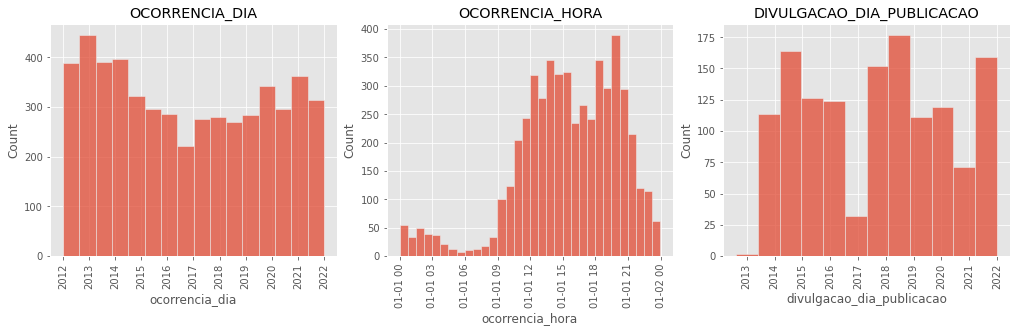

In [31]:
# plot a hist chart of datetime features
categorical_plot( df_date, n_cols = 4, countplot = False)

### 6.2.2 - Numerical Variables

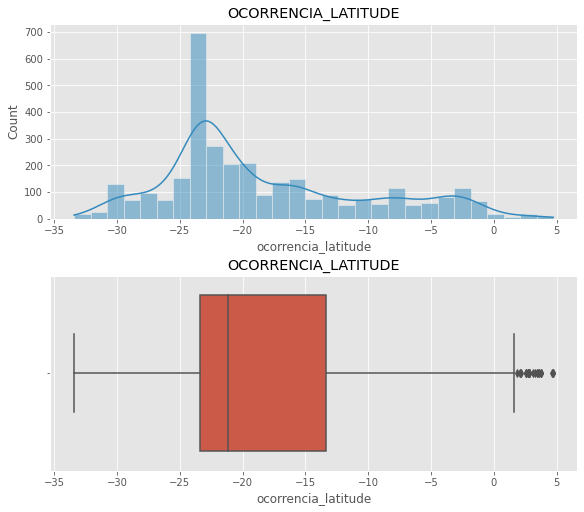

In [32]:
# plot a hist
numerical_plot( dataframe = df_num, column = "ocorrencia_latitude")

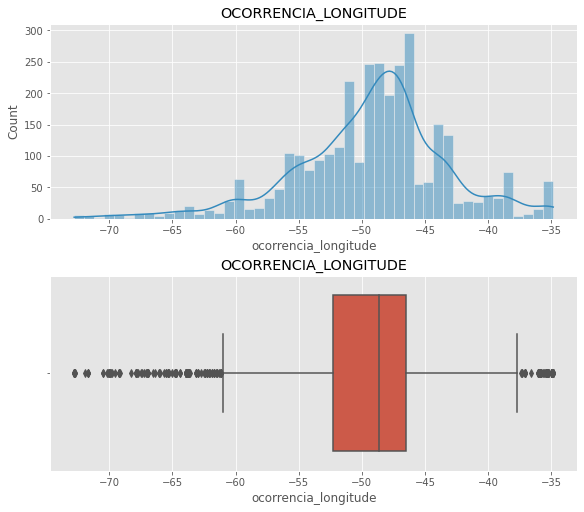

In [33]:
# plot a hist
numerical_plot( dataframe = df_num, column = "ocorrencia_longitude")

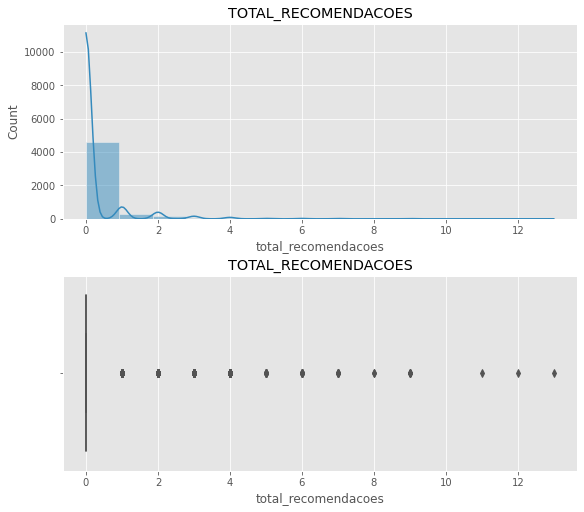

In [34]:
# plot a hist
numerical_plot( dataframe = df_num, column = "total_recomendacoes")

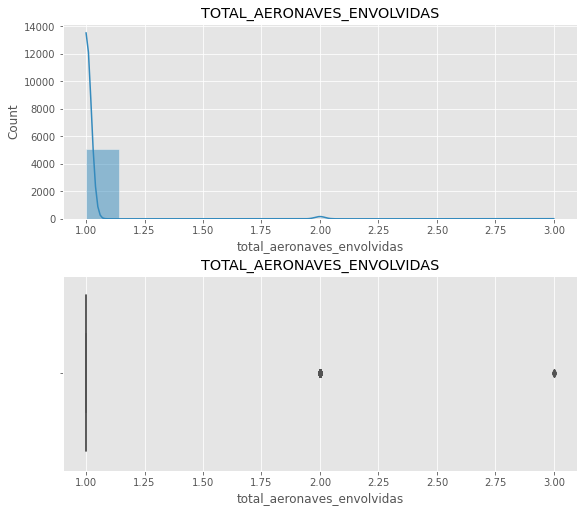

In [35]:
# plot a hist
numerical_plot( dataframe = df_num, column = "total_aeronaves_envolvidas")

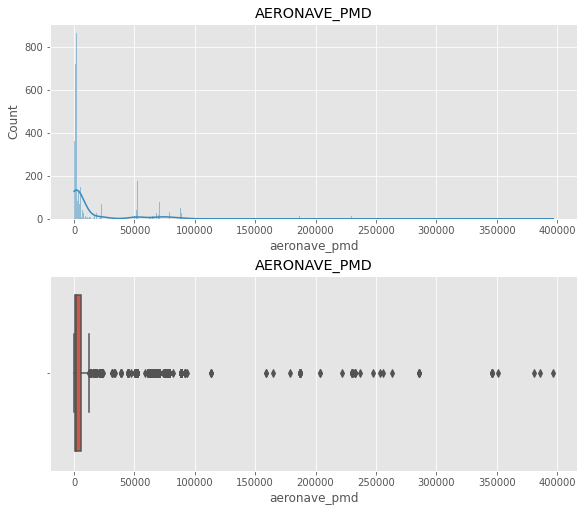

In [36]:
# plot a hist
numerical_plot( dataframe = df_num, column = "aeronave_pmd")

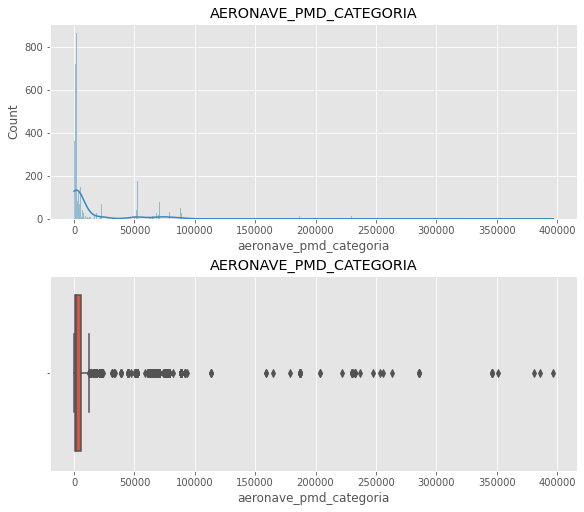

In [37]:
# plot a hist
numerical_plot( dataframe = df_num, column = "aeronave_pmd_categoria")

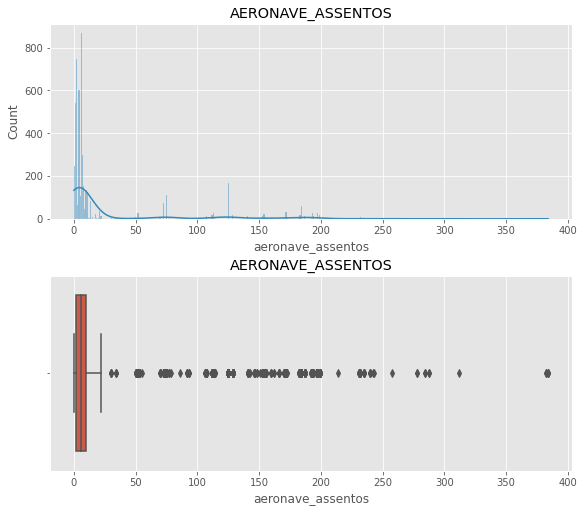

In [38]:
# plot a hist
numerical_plot( dataframe = df_num, column = "aeronave_assentos")

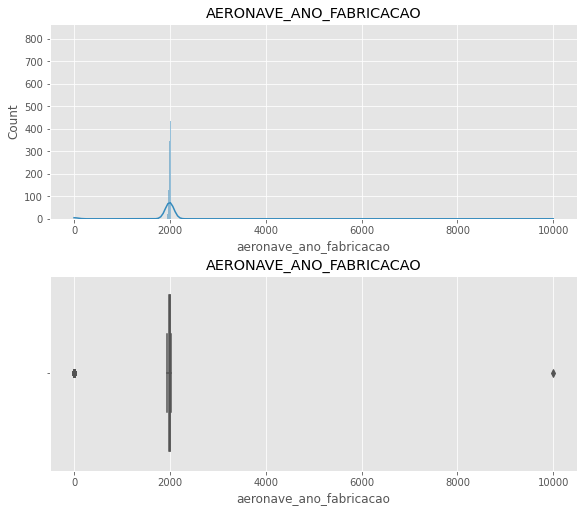

In [39]:
# plot a hist
numerical_plot( dataframe = df_num, column = "aeronave_ano_fabricacao")

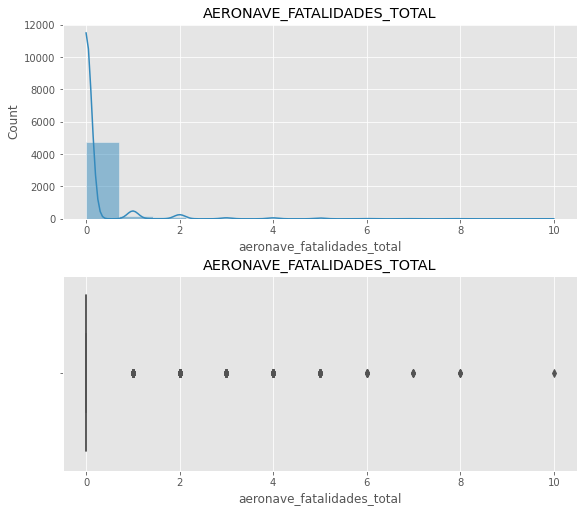

In [40]:
# plot a hist
numerical_plot( dataframe = df_num, column = "aeronave_fatalidades_total")

### 6.2.3 - Categorical Variables

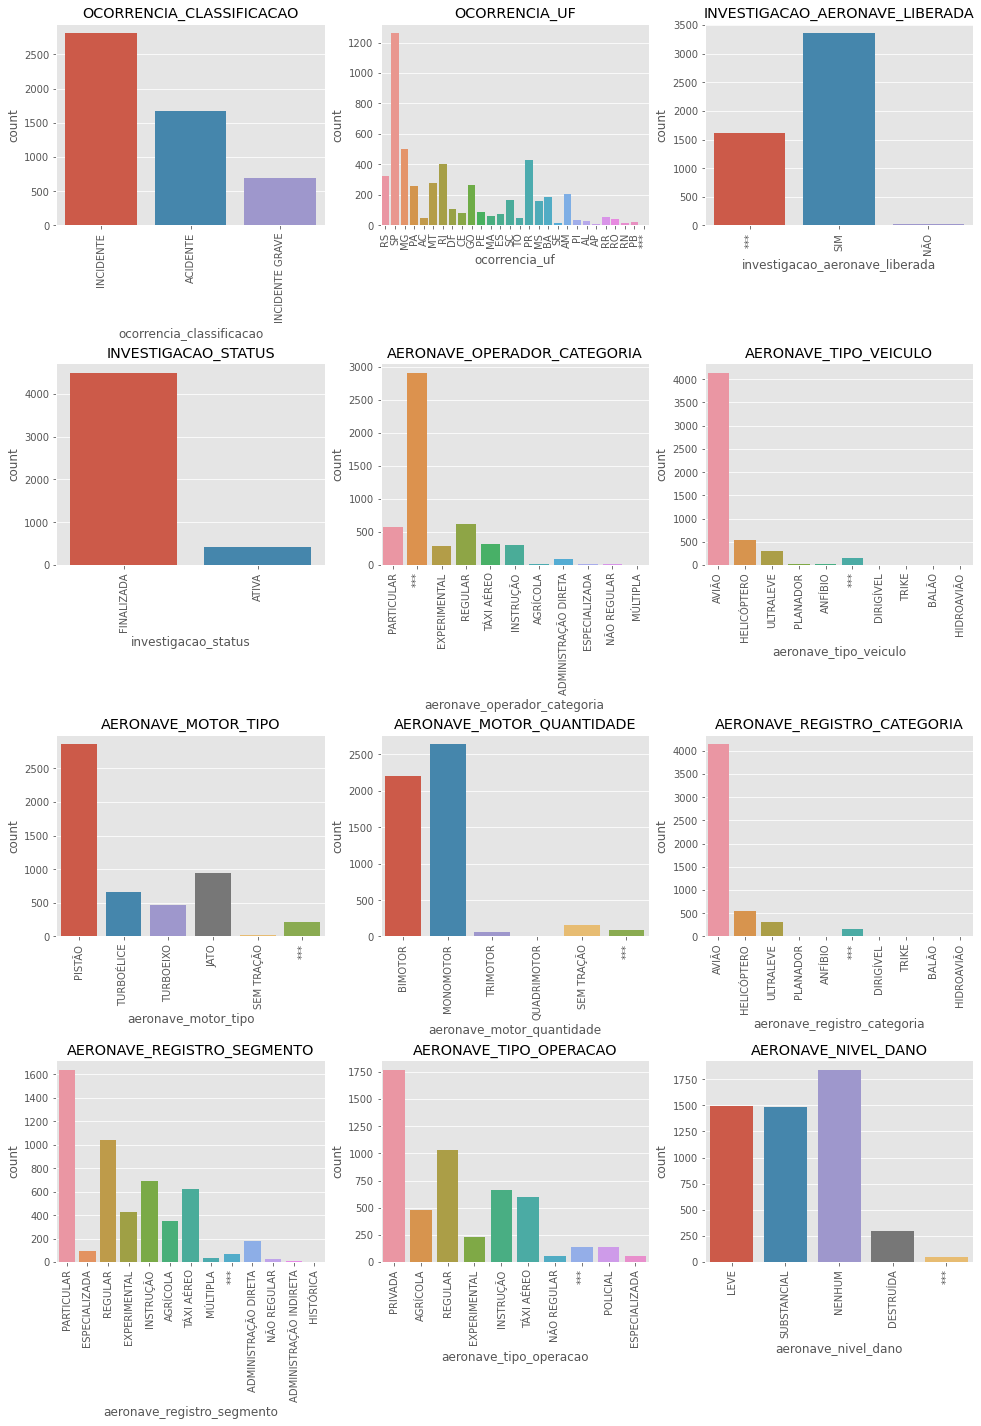

In [41]:
# plot histplot for every categorical column
categorical_plot( df_cat[ selected_cat_cols ], n_cols = 3 )

## 6.3 - Bivariate Analysis

*Analyze the relation between specific variables*

### 6.3.1 - Validate hypotheses

#### **H1.** O número de acidentes no estado com maior numero de acidentes é pelo menos 50% maior que a média dos outros estados.

> **H1 IS TRUE**. SP is the state with higher number of accidentes and the number of "ocurrencias" in SP (alone) is 8.72 times the average number of "ocorrencias" on all remaining other states.

In [42]:
# groupby ocorrencia_uf information and count how many occurrencies
df_aux = df_eda[ ["codigo_ocorrencia", "ocorrencia_uf"] ].groupby(by = "ocorrencia_uf", as_index = False).agg("count")
# rename aggregated column
df_aux.rename( columns = {"codigo_ocorrencia": "codigo_ocorrencia_count"}, inplace = True)

# sort values by number of "ocorrencias"
df_aux.sort_values("codigo_ocorrencia_count", ascending = False, inplace = True)

# check operation
df_aux

,ocorrencia_uf,codigo_ocorrencia_count
26,SP,1261
11,MG,499
18,PR,431
19,RJ,402
23,RS,327
13,MT,276
9,GO,268
14,PA,261
3,AM,207
5,BA,183


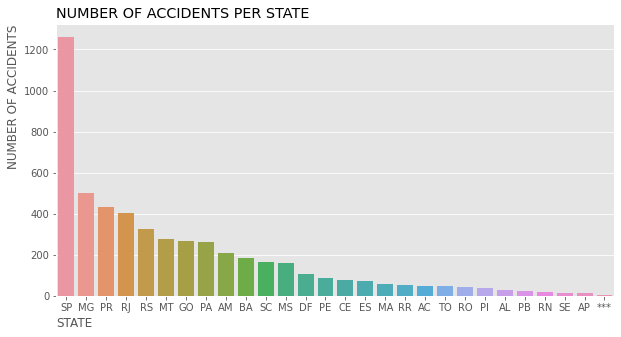

In [43]:
# plot number of ocorrencias for each state
sns.barplot( data = df_aux, x = "ocorrencia_uf", y = "codigo_ocorrencia_count")
plt.title("NUMBER OF ACCIDENTS PER STATE", loc = "left")
plt.ylabel("NUMBER OF ACCIDENTS", loc = "top")
plt.xlabel("STATE", loc = "left");

In [44]:
# get the number of ocorrencias inside SP
sp_mean = int( df_aux.loc[ df_aux["ocorrencia_uf"] == "SP", "codigo_ocorrencia_count"] )

# create a dataframe with ocorrencias outside SP
df_aux_outside_sp = df_aux[ df_aux["ocorrencia_uf"] != "SP"]
# the the mean of ocorrencia on UFs outside SP
outside_sp_mean = df_aux_outside_sp["codigo_ocorrencia_count"].mean()

# NOTE that the number of ocorrencias inside SP is equal to the mean of ocorrencias inside SP.
# So we are comparing averages when we compare sp_mean with outside_sp_mean

# print report
print(f'The number of "ocurrencias" in SP (alone) is {round(sp_mean / outside_sp_mean, 2)} times the average number of "ocorrencias" on all other states.')

The number of "ocurrencias" in SP (alone) is 8.72 times the average number of "ocorrencias" on all other states.


<h4 style="text-align:center;">Possible actionable:</h4> 
<p style="text-align:center;"><i>SP is a key state when trying to reduce the total number of accidents in Brasil. 
<br>
As a first solution, the testing campaigns ought to be tested in this state (as the campaign performance could be more readily apparent).</i></p>

#### **H2.** O número de acidentes nos dias de fim de semana (sexta, sábado e domingo) é 20% maior que durante os dias de semana.

> **H2 IS FALSE**. The number of "ocurrencias" in weekend days is approximately 76% the number of "ocorrencias" in week days. In other words, the number of accidents during week days is higher than during weekend days.

In [45]:
# create one auxiliary dataframe with ocorrencia_dia and codigo_ocorrencia
df_aux = df_eda[ ["ocorrencia_dia", "codigo_ocorrencia"] ].copy()

# create a column for day of week (sunday = 0)
df_aux["day_of_week"] = df_aux["ocorrencia_dia"].dt.strftime('%w').astype( "int8" )

# map if day is weekday or not
df_aux["weekend"] = df_aux["day_of_week"].apply( lambda x: "weekend" if x in (0, 5, 6) else "weekday")

# groupby weekend and count how many occurrencies
df_ = df_aux[ ["codigo_ocorrencia", "weekend"] ].groupby(by = "weekend", as_index = False).agg("count")
# rename aggregated column
df_.rename( columns = {"codigo_ocorrencia": "codigo_ocorrencia_count"}, inplace = True)

# check operations
df_

,weekend,codigo_ocorrencia_count
0,weekday,2941
1,weekend,2226


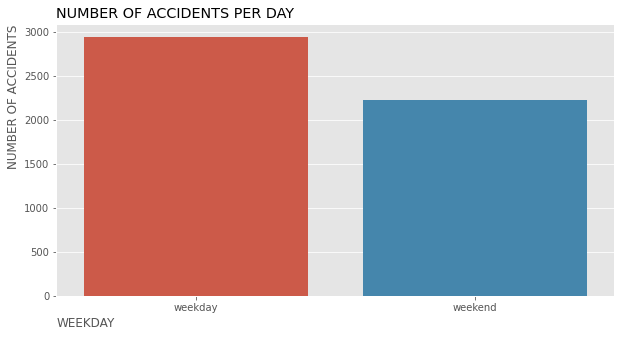

In [46]:
# plot number of ocorrencias for week days
sns.barplot( data = df_, x = "weekend", y = "codigo_ocorrencia_count")
plt.title("NUMBER OF ACCIDENTS PER DAY", loc = "left")
plt.ylabel("NUMBER OF ACCIDENTS", loc = "top")
plt.xlabel("WEEKDAY", loc = "left");

In [47]:
# define variables to create proportions
weekday_accid = int(df_.loc[df_["weekend"] == "weekday", "codigo_ocorrencia_count"])
weekend_accid = int(df_.loc[df_["weekend"] == "weekend", "codigo_ocorrencia_count"])

# print report
print(f'The number of "ocurrencias" in weekend days is {round(weekend_accid / weekday_accid, 2)} times the number of "ocorrencias" in week days');

The number of "ocurrencias" in weekend days is 0.76 times the number of "ocorrencias" in week days


#### **H3.** A média de acidentes no período entre 20h e 6h é mais de 30% maior que a média dos outros horários.

> **H3 IS FALSE.** The number of "ocurrencias" between 20h and 6h is about 31% the number of "ocorrencias" on the remaining hours. In other words, that are much more accidents during the day than during the night.

In [48]:
# create one auxiliary dataframe with ocorrencia_hora and codigo_ocorrencia
df_aux = df_eda[ ["ocorrencia_hora", "codigo_ocorrencia"] ].copy()

# get the datetime column and extract one the hour information
df_aux["hora"] = df_aux["ocorrencia_hora"].apply( lambda x: x.hour)

# create a column to map if it is day or night time
df_aux["night"] = df_aux["hora"].apply( lambda x: "night" if (x < 6 or x >= 20) else "day")

# groupby night and count how many occurrencies
df_ = df_aux[ ["codigo_ocorrencia", "night"] ].groupby(by = "night", as_index = False).agg("count")
# rename aggregated column
df_.rename( columns = {"codigo_ocorrencia": "codigo_ocorrencia_count"}, inplace = True)

# check operations
df_

,night,codigo_ocorrencia_count
0,day,3947
1,night,1220


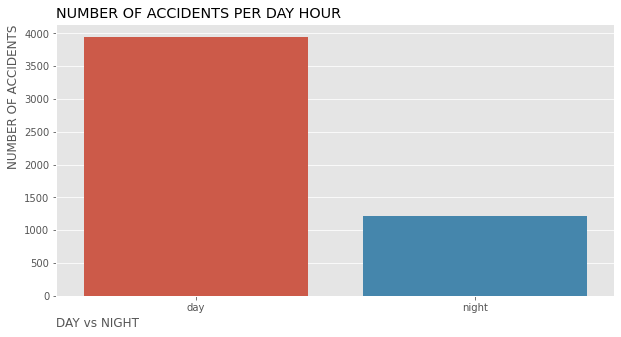

In [49]:
# plot number of ocorrencias for week days
sns.barplot( data = df_, x = "night", y = "codigo_ocorrencia_count")
plt.title("NUMBER OF ACCIDENTS PER DAY HOUR", loc = "left")
plt.ylabel("NUMBER OF ACCIDENTS", loc = "top")
plt.xlabel("DAY vs NIGHT", loc = "left");

In [50]:
# define variables to create proportions
day_accid = int(df_.loc[df_["night"] == "day", "codigo_ocorrencia_count"])
night_accid = int(df_.loc[df_["night"] == "night", "codigo_ocorrencia_count"])

# print report
print(f'The number of "ocurrencias" between 20h and 6h is {round(night_accid / day_accid, 2)} times the number of "ocorrencias" on the remaining hours');

The number of "ocurrencias" between 20h and 6h is 0.31 times the number of "ocorrencias" on the remaining hours


#### **H4.** O número de acidentes com pelo menos uma vítima fatal é 90% maior que o número de acidentes sem nenhuma vítima fatal.

> **H4 IS FALSE**. The number of accidents with at least one fatal victim is about 8% the number of "ocorrencias" without any fatality. That is, there are much more accidents without fatal victims than with fatal victims.

In [51]:
# groupby aeronave_fatalidades_total and count how many occurrencies
df_aux = df_eda[ ["codigo_ocorrencia", "aeronave_fatalidades_total"] ].groupby(by = "aeronave_fatalidades_total", as_index = False).agg("count")
# rename aggregated column
df_aux.rename( columns = {"codigo_ocorrencia": "codigo_ocorrencia_count"}, inplace = True)

# create one column to indicate if, at least, there was one fatality
df_aux["at_least_one_fatal"] = df_aux["aeronave_fatalidades_total"].apply( lambda x: False if x == 0 else True )

# check operation
df_aux.sort_values("codigo_ocorrencia_count", ascending = False).head()

,aeronave_fatalidades_total,codigo_ocorrencia_count,at_least_one_fatal
0,0,4779,False
1,1,202,True
2,2,106,True
3,3,25,True
4,4,24,True


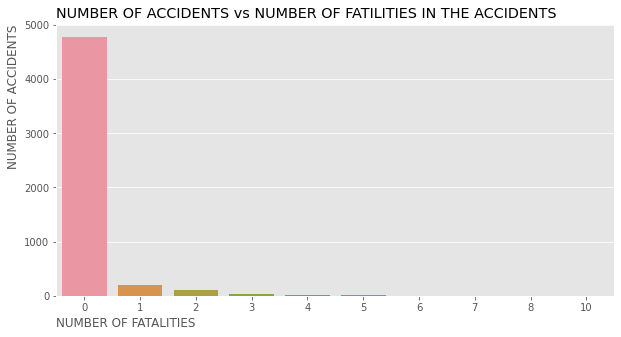

In [52]:
# plot number of ocorrencias for each state
sns.barplot( data = df_aux, x = "aeronave_fatalidades_total", y = "codigo_ocorrencia_count")
plt.title("NUMBER OF ACCIDENTS vs NUMBER OF FATILITIES IN THE ACCIDENTS", loc = "left")
plt.ylabel("NUMBER OF ACCIDENTS", loc = "top")
plt.xlabel("NUMBER OF FATALITIES", loc = "left");

In [53]:
# groupby at_least_one_fatal and sum codigo_ocorrencia_count
df_ = df_aux[ ["codigo_ocorrencia_count", "at_least_one_fatal"] ].groupby(by = "at_least_one_fatal", as_index = False).agg("sum")
# rename aggregated column
df_.rename( columns = {"codigo_ocorrencia_count": "codigo_ocorrencia_sum"}, inplace = True)

# check operation
df_

,at_least_one_fatal,codigo_ocorrencia_sum
0,False,4779
1,True,388


In [54]:
# define variables to create proportion
at_least_one_fatal = int(df_.loc[df_["at_least_one_fatal"] == True, "codigo_ocorrencia_sum"])
no_fatal = int(df_.loc[df_["at_least_one_fatal"] == False, "codigo_ocorrencia_sum"])

# print report
print(f'The number of "ocurrencias" with at least one fatal victim is {round(at_least_one_fatal / no_fatal, 2)} times the number of "ocorrencias" without any fatality');

The number of "ocurrencias" with at least one fatal victim is 0.08 times the number of "ocorrencias" without any fatality


#### **H5.** - O número de acidentes com avião monomotor é pelo menos 50% maior que as aviões bimotores.

> **H5 IS FALSE**. The number of "ocurrencias" with monomotor is about 20% higher than the the total number of "ocorrencias" with bimotor.

In [55]:
# groupby aeronave_motor_quantidade and count how many occurrencies
df_aux = df_eda[ ["codigo_ocorrencia", "aeronave_motor_quantidade"] ].groupby(by = "aeronave_motor_quantidade", as_index = False).agg("count")
# rename aggregated column
df_aux.rename( columns = {"codigo_ocorrencia": "codigo_ocorrencia_count"}, inplace = True)

# check operation
df_aux.sort_values("codigo_ocorrencia_count", ascending = False)

,aeronave_motor_quantidade,codigo_ocorrencia_count
2,MONOMOTOR,2639
1,BIMOTOR,2203
4,SEM TRAÇÃO,162
0,***,90
5,TRIMOTOR,68
3,QUADRIMOTOR,5


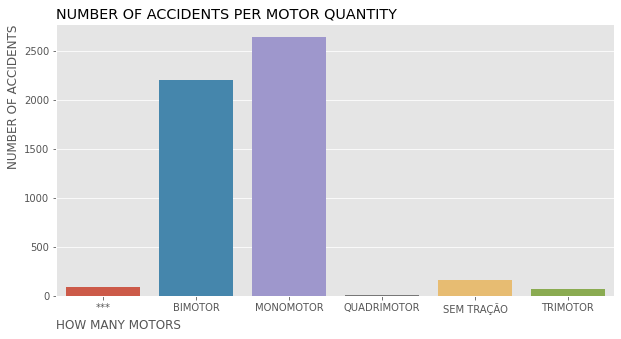

In [56]:
# plot number of ocorrencias for each state
sns.barplot( data = df_aux, x = "aeronave_motor_quantidade", y = "codigo_ocorrencia_count")
plt.title("NUMBER OF ACCIDENTS PER MOTOR QUANTITY", loc = "left")
plt.ylabel("NUMBER OF ACCIDENTS", loc = "top")
plt.xlabel("HOW MANY MOTORS", loc = "left");

In [57]:
# define variables to create proportion
mono_failure = int(df_aux.loc[df_aux["aeronave_motor_quantidade"] == "MONOMOTOR", "codigo_ocorrencia_count"])
bimotor_failure = int(df_aux.loc[df_aux["aeronave_motor_quantidade"] == "BIMOTOR", "codigo_ocorrencia_count"])
total_accidents = int(df_aux["codigo_ocorrencia_count"].sum())

# print report
print(f'The number of "ocurrencias" with monomotor is {round(mono_failure / bimotor_failure, 2)} times the total number of "ocorrencias" with bimotor.')

The number of "ocurrencias" with monomotor is 1.2 times the total number of "ocorrencias" with bimotor.


#### **H6.** O verão tem um número de acidente pelo menos 10% maior que a média das outras estações.

> **H6 IS TRUE**. The number of "ocurrencias" in the summer is about 15% higher than the average number of "ocorrencias" in the remaining seasons.

In [58]:
# create one auxiliary dataframe with ocorrencia_dia and codigo_ocorrencia
df_aux = df_eda[ ["ocorrencia_dia", "codigo_ocorrencia"] ].copy()

# get the datetime column and extract the month information
df_aux["month"] = df_aux["ocorrencia_dia"].apply( lambda x: x.month )

# create a column to map what is the the season
df_aux["season"] = df_aux["month"].apply( lambda x: "summer" if x in [1, 2, 3] else
                                                    "autumn" if x in [4, 5, 6] else
                                                    "winter" if x in [7, 8, 9] else
                                                    "spring" if x in [10, 11, 12] else
                                                    "error") # recheck code! there are misleading values!
                                         
# groupby season and count how many occurrencies
df_ = df_aux[ ["codigo_ocorrencia", "season"] ].groupby(by = "season", as_index = False).agg("count")
# rename aggregated column
df_.rename( columns = {"codigo_ocorrencia": "codigo_ocorrencia_count"}, inplace = True)

# check operations
df_.sort_values("codigo_ocorrencia_count", ascending = False)

,season,codigo_ocorrencia_count
2,summer,1431
3,winter,1266
1,spring,1265
0,autumn,1205


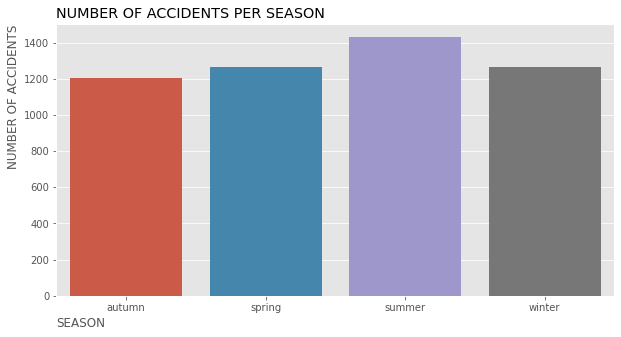

In [59]:
# plot number of ocorrencias for each state
sns.barplot( data = df_, x = "season", y = "codigo_ocorrencia_count")
plt.title("NUMBER OF ACCIDENTS PER SEASON", loc = "left")
plt.ylabel("NUMBER OF ACCIDENTS", loc = "top")
plt.xlabel("SEASON", loc = "left");

In [60]:
# define variables to create proportion
summer_accid = int(df_.loc[df_["season"] == "summer", "codigo_ocorrencia_count"])
winter_accid = int(df_.loc[df_["season"] == "winter", "codigo_ocorrencia_count"])
non_summer_accid = int(df_.loc[df_["season"] != "summer", "codigo_ocorrencia_count"].mean())
total_number_accidents = int(df_["codigo_ocorrencia_count"].sum())

# print report
print(f'The number of "ocurrencias" in the summer is {round(summer_accid / non_summer_accid, 2)} times the average number of "ocorrencias" in the remaining seasons', '\n');

The number of "ocurrencias" in the summer is 1.15 times the average number of "ocorrencias" in the remaining seasons 



<h4 style="text-align:center;">Possible actionable:</h4> 
<p style="text-align:center;"><i>The is not large difference in number of accidents among different seasons.
<br>
So, campaigns ought to be consistent throughtout the year in order to achieve meaningful results in terms of accident reduction. 
</i></p>

#### **H7.** Menos de 10% dos acidentes envolvem duas ou mais aeronaves.

> **H7 IS TRUE**. The number of "ocurrencias" that has at least two aircraft involved is about 1% of the total number of "ocorrencias".

In [61]:
# groupby total_aeronaves_envolvidas and count how many occurrencies
df_aux = df_eda[ ["codigo_ocorrencia", "total_aeronaves_envolvidas"] ].groupby(by = "total_aeronaves_envolvidas", as_index = False).agg("count")
# rename aggregated column
df_aux.rename( columns = {"codigo_ocorrencia": "codigo_ocorrencia_count"}, inplace = True)

# create a column to map if two of more aircraft were involved
df_aux["at_least_two_aircrafts"] = df_aux["total_aeronaves_envolvidas"].apply( lambda x: True if x >= 2 else False)

# check operation
df_aux.sort_values("codigo_ocorrencia_count", ascending = False)

,total_aeronaves_envolvidas,codigo_ocorrencia_count,at_least_two_aircrafts
0,1,5102,False
1,2,62,True
2,3,3,True


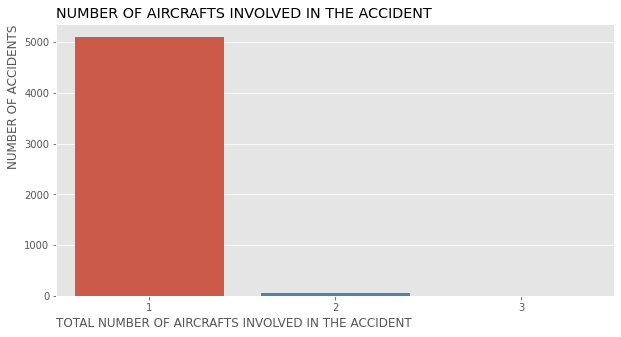

In [62]:
# plot number of ocorrencias for each state
sns.barplot( data = df_aux, x = "total_aeronaves_envolvidas", y = "codigo_ocorrencia_count")
plt.title("NUMBER OF AIRCRAFTS INVOLVED IN THE ACCIDENT", loc = "left")
plt.ylabel("NUMBER OF ACCIDENTS", loc = "top")
plt.xlabel("TOTAL NUMBER OF AIRCRAFTS INVOLVED IN THE ACCIDENT", loc = "left");

In [63]:
# define variables to create proportion
at_least_two_aircrafts = int(df_aux.loc[df_aux["at_least_two_aircrafts"], "codigo_ocorrencia_count"].sum())
total_num_acidents = int(df_aux["codigo_ocorrencia_count"].sum())

# print report
print(f'The number of "ocurrencias" that has at least two aircrafts involved is {round(at_least_two_aircrafts / total_num_acidents, 2)} times the total number of "ocorrencias"');

The number of "ocurrencias" that has at least two aircrafts involved is 0.01 times the total number of "ocorrencias"


#### **H8.** Mais de 80% das aeronaves ficam destruídas após os acidentes.

> **H8 IS FALSE.** The number of "ocurrencias" that destroys the aircraft is about 6% of the total number of "ocorrencias". Besides, 
the number of "ocurrencias" that at least causes a substantial damage to the aircraft is about 35% of the total number of "ocorrencias"

In [64]:
# groupby aeronave_nivel_dano and count how many occurrencies
df_aux = df_eda[ ["codigo_ocorrencia", "aeronave_nivel_dano"] ].groupby(by = "aeronave_nivel_dano", as_index = False).agg("count")
# rename aggregated column
df_aux.rename( columns = {"codigo_ocorrencia": "codigo_ocorrencia_count"}, inplace = True)

# create columns to map level of damage
df_aux["destruida"] = df_aux["aeronave_nivel_dano"].apply( lambda x: True if x == "DESTRUÍDA" else False)
df_aux["at_least_substantial"] = df_aux["aeronave_nivel_dano"].apply( lambda x: True if (x == "DESTRUÍDA" or x == "SUBSTANCIAL") else False)

# check operation
df_aux.sort_values("codigo_ocorrencia_count", ascending = False)

,aeronave_nivel_dano,codigo_ocorrencia_count,destruida,at_least_substantial
3,NENHUM,1839,False,False
2,LEVE,1494,False,False
4,SUBSTANCIAL,1488,False,True
1,DESTRUÍDA,299,True,True
0,***,47,False,False


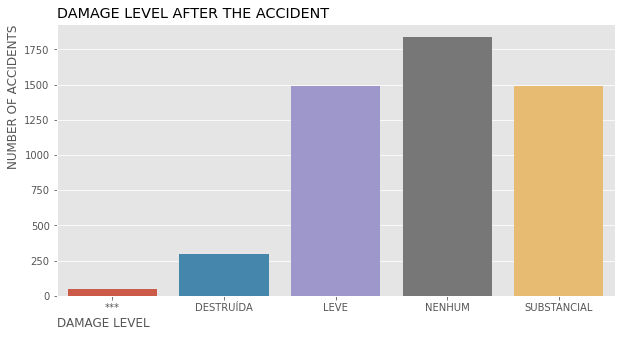

In [65]:
# plot number of ocorrencias for each state
sns.barplot( data = df_aux, x = "aeronave_nivel_dano", y = "codigo_ocorrencia_count")
plt.title("DAMAGE LEVEL AFTER THE ACCIDENT", loc = "left")
plt.ylabel("NUMBER OF ACCIDENTS", loc = "top")
plt.xlabel("DAMAGE LEVEL", loc = "left");

In [66]:
# define variables to create proportion
destruida = int(df_aux.loc[df_aux["destruida"], "codigo_ocorrencia_count"])
at_least_substancial = int(df_aux.loc[df_aux["at_least_substantial"], "codigo_ocorrencia_count"].sum())
total_num_acidents = int(df_aux["codigo_ocorrencia_count"].sum())

# print report
print(f'The number of "ocurrencias" that destroys the aircraft is {round(destruida / total_num_acidents, 2)} times the total number of "ocorrencias"', "\n");
print(f'The number of "ocurrencias" that at least causes a substantial damage to the aircraft is {round(at_least_substancial / total_num_acidents, 2)} times the total number of "ocorrencias"');

The number of "ocurrencias" that destroys the aircraft is 0.06 times the total number of "ocorrencias" 

The number of "ocurrencias" that at least causes a substantial damage to the aircraft is 0.35 times the total number of "ocorrencias"


#### **H9.** Menos de 5% das aeronaves que sofrem acidentes são registradas fora do Brasil.

> **H9 IS TRUE.** The number of "ocurrencias" with aircrafts not registred in Brazil is about 2% of the total number of "ocorrencias" 

In [67]:
# groupby aeronave_pais_registro and count how many occurrencies
df_aux = df_eda[ ["codigo_ocorrencia", "aeronave_pais_registro"] ].groupby(by = "aeronave_pais_registro", as_index = False).agg("count")
# rename aggregated column
df_aux.rename( columns = {"codigo_ocorrencia": "codigo_ocorrencia_count"}, inplace = True)

# create columns to map aircrafts registred in Brazil
df_aux["brazilian"] = df_aux["aeronave_pais_registro"].apply( lambda x: True if x == "BRASIL" else False)

# check operation
df_aux.sort_values("codigo_ocorrencia_count", ascending = False).head()

,aeronave_pais_registro,codigo_ocorrencia_count,brazilian
3,BRASIL,5080,True
7,ESTADOS UNIDOS,38,False
11,NÃO IDENTIFICADO,13,False
13,PARAGUAI,6,False
4,CHILE,4,False


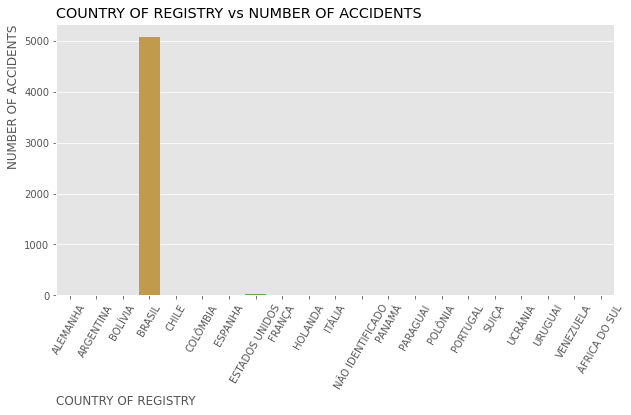

In [68]:
# plot number of ocorrencias for each state
sns.barplot( data = df_aux, x = "aeronave_pais_registro", y = "codigo_ocorrencia_count")
plt.title("COUNTRY OF REGISTRY vs NUMBER OF ACCIDENTS", loc = "left")
plt.ylabel("NUMBER OF ACCIDENTS", loc = "top")
plt.xlabel("COUNTRY OF REGISTRY", loc = "left")
plt.xticks(rotation = 60);

In [69]:
# define variables to create proportion
foreign_aircrafts = int(df_aux.loc[~df_aux["brazilian"], "codigo_ocorrencia_count"].sum())
total_num_acidents = int(df_aux["codigo_ocorrencia_count"].sum())

# print report
print(f'The number of "ocurrencias" with aircrafts not registred in Brazil is {round(foreign_aircrafts / total_num_acidents, 2)} times \nthe total number of "ocorrencias"', "\n");

The number of "ocurrencias" with aircrafts not registred in Brazil is 0.02 times 
the total number of "ocorrencias" 



#### **H10.** Os acidentes com aeronaves em voos privados respondem por 70% do número total de acidentes.

> **H10 IS FALSE.** The number of "ocurrencias" with private aircrafts is about 34% of the total number of "ocorrencias"

In [70]:
# groupby aeronave_tipo_operacao and count how many occurrencies
df_aux = df_eda[ ["codigo_ocorrencia", "aeronave_tipo_operacao"] ].groupby(by = "aeronave_tipo_operacao", as_index = False).agg("count")
# rename aggregated column
df_aux.rename( columns = {"codigo_ocorrencia": "codigo_ocorrencia_count"}, inplace = True)

# create columns to map private aircrafts
df_aux["private"] = df_aux["aeronave_tipo_operacao"].apply( lambda x: True if x == "PRIVADA" else False)

# check operation
df_aux.sort_values("codigo_ocorrencia_count", ascending = False)

,aeronave_tipo_operacao,codigo_ocorrencia_count,private
7,PRIVADA,1768,True
8,REGULAR,1033,False
4,INSTRUÇÃO,659,False
9,TÁXI AÉREO,601,False
1,AGRÍCOLA,481,False
3,EXPERIMENTAL,233,False
6,POLICIAL,143,False
0,***,137,False
5,NÃO REGULAR,60,False
2,ESPECIALIZADA,52,False


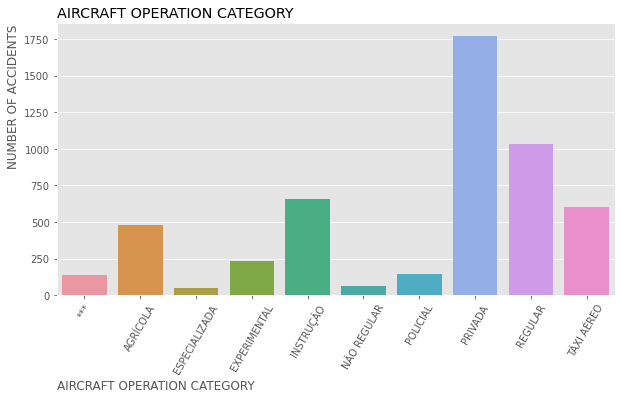

In [71]:
# plot number of ocorrencias for each state
sns.barplot( data = df_aux, x = "aeronave_tipo_operacao", y = "codigo_ocorrencia_count")
plt.title("AIRCRAFT OPERATION CATEGORY", loc = "left")
plt.ylabel("NUMBER OF ACCIDENTS", loc = "top")
plt.xlabel("AIRCRAFT OPERATION CATEGORY", loc = "left")
plt.xticks(rotation = 60);

In [72]:
# define variables to create proportion
private = int(df_aux.loc[df_aux["private"], "codigo_ocorrencia_count"])
total_num_acidents = int(df_aux["codigo_ocorrencia_count"].sum())

# print report
print(f'The number of "ocurrencias" with private aircrafts is {round(private / total_num_acidents, 2)} times the total number of "ocorrencias"');

The number of "ocurrencias" with private aircrafts is 0.34 times the total number of "ocorrencias"


<h4 style="text-align:center;">Possible actionable:</h4> 
<p style="text-align:center;"><i>Private aircraft alone corresponds to more than 30% of the total number of accidents.
<br>
So, campaigns ought to also focus on private aircrafts and not only "companies/business" aircrafts in order to achieve meaningful results. 
</i></p>

### 6.3.2 - Inspect other variables

*Due to time restriction, it will be done on the next project cycle*

## 6.4 - Multivariate Analysis

*Analyse multiple relationship between variables*

### 6.4.1 - Numerical Features

*Inspect the correlation between numerical features*

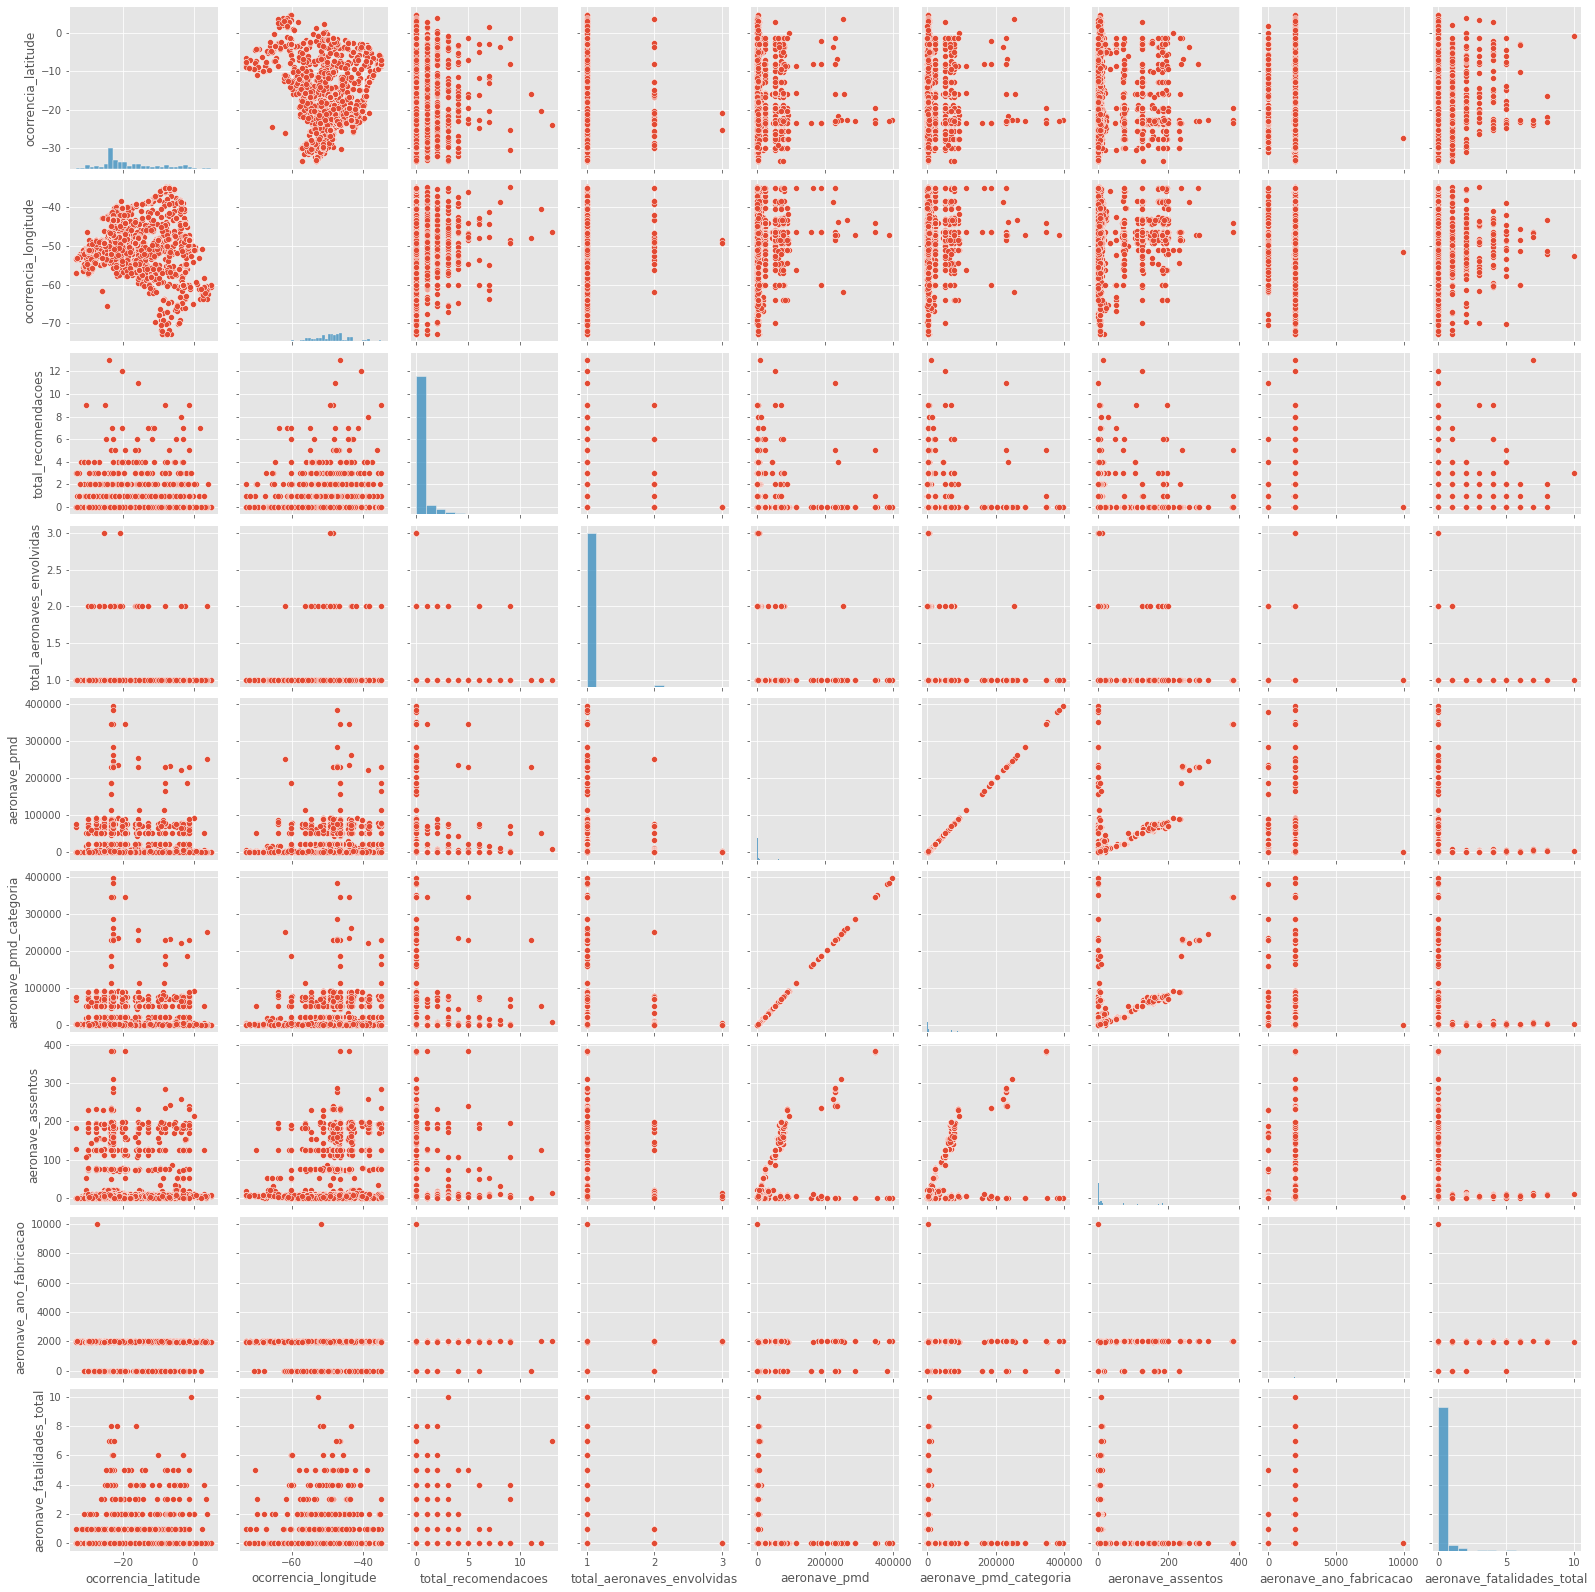

In [73]:
# plot pairplot
sns.pairplot( df_num );

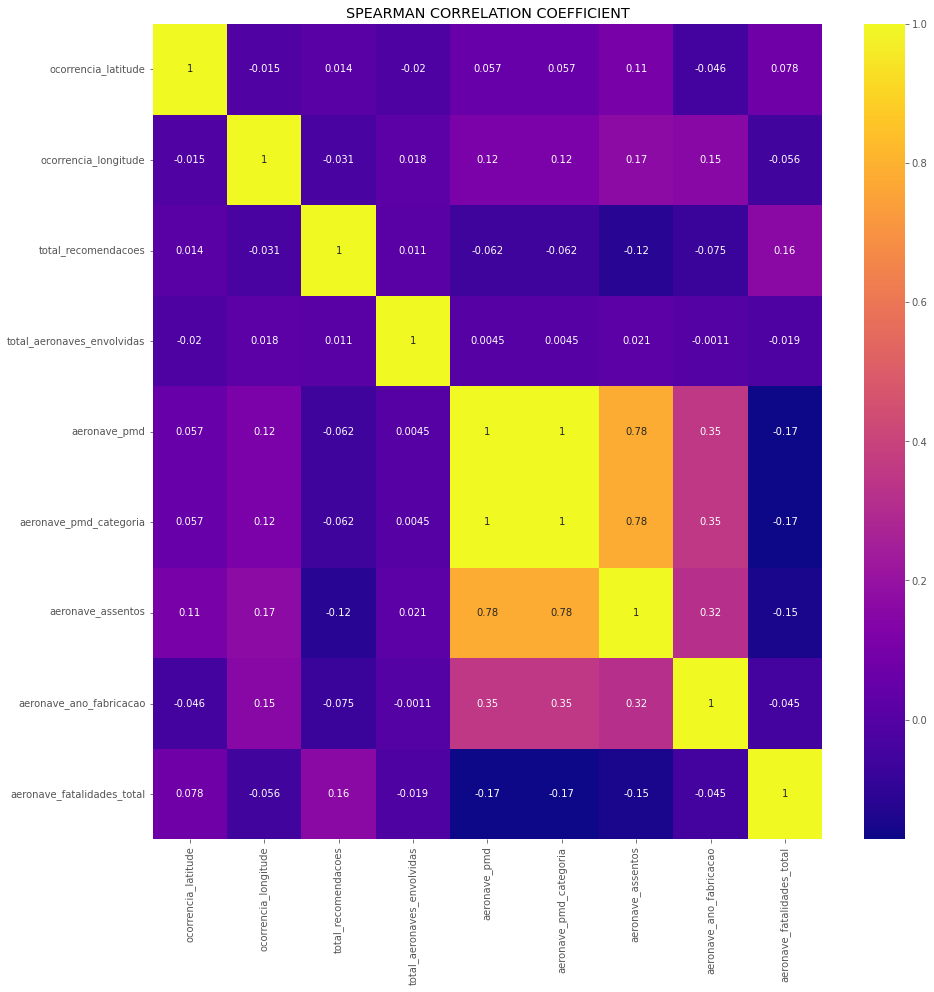

In [74]:
# calculate spearman correlation for numerical features
correlation = df_num.corr( method = 'spearman' ) # get non-linear relationships

# create figure and ax object
fig, ax = plt.subplots( figsize = (15, 15) )

# display heatmap of correlation on figure
sns.heatmap( correlation, annot = True, ax = ax, cmap = "plasma")
plt.title("SPEARMAN CORRELATION COEFFICIENT")
plt.yticks( rotation = 0 );

### 6.4.2 - Categorical Features

*Inspect the correlation between categorical features*

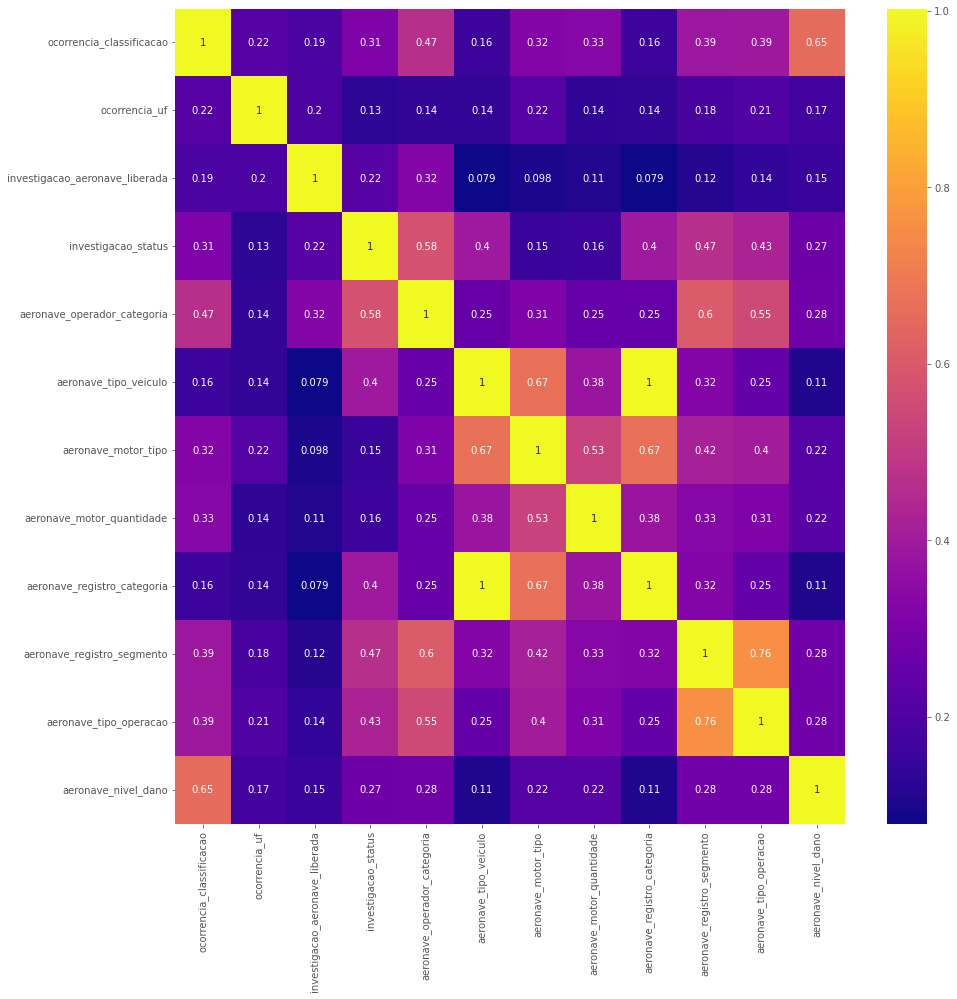

In [75]:
# make a copy of cat dataframe with the required columns
df_aux = df_cat[ selected_cat_cols ].copy()


# The implementation of Cramer-V statistics implemented for this project doesn't handle missing values
# so we will replace them with value "***" once it is a value with unkown meaning that is already on the dataframe 
df_aux = df_aux.replace(np.nan, "***")

# create a dataframe with cramer-v for every row-column pair
cramer_v_corr = create_cramer_v_dataframe( df_aux )

# create figure and ax object
fig, ax = plt.subplots( figsize = (15, 15) )

# display heatmap of correlation on figure
sns.heatmap( cramer_v_corr, annot = True, ax = ax, cmap = "plasma");